# Project 2 - Ames Housing Data and Kaggle Challenge




## Problem Statement
To create a model based to predict the housing price for a home seller in Ames Housing Dataset. 

Data set contains information used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

## Executive Summary
Develop a linear regression model to predit the housing price in Ames Iowa.

### Contents Breakdown
train data: project_2_test-data_pre-model.ipynb  (this notebook)
test data: project_2_train-data_pre-model.ipynb 
    - [Import all libaries and data files](#Import all libaries and data files)
    - [Data Cleansing](#Data Cleansing)
    - [EDA](#EDA)
project_2_modeling.ipynb
    - [Modeling](#Modeling)
    - [Reporting](#Reporting)
    - [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## 1. Import all libaries and data files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import pickle

from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score, KFold

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
train_df = pd.read_csv('../datasets/train.csv')    # shape is (2051, 81)
test_df = pd.read_csv('../datasets/test.csv')      # shape is (879, 80)

In [3]:
train_df.shape

(2051, 81)

## 2. Data Cleansing

In [4]:
# display all cols
pd.set_option("display.max_columns", 150)
train_df.head(5)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

#### Check type of sales by 'MS Zoning'

In [5]:
train_df['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

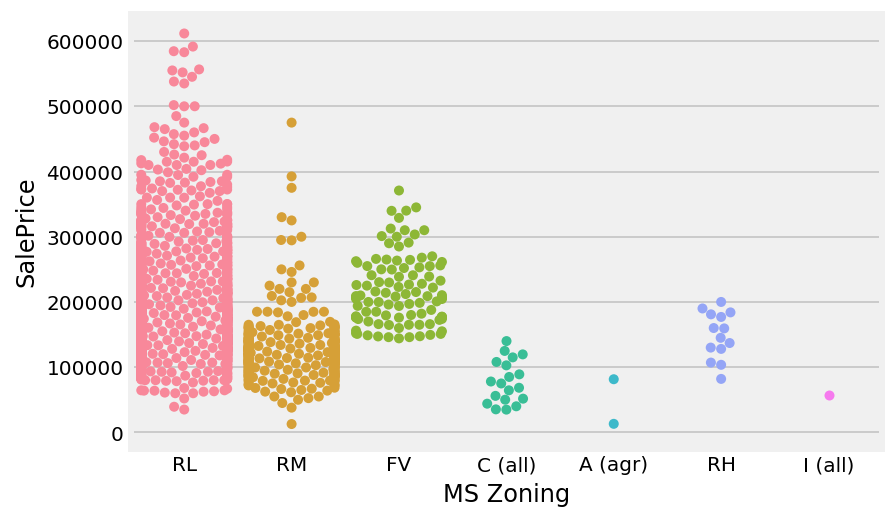

In [6]:
sns.swarmplot(train_df['MS Zoning'],train_df['SalePrice'])

**Decision**
* We are going to model sales price for residential properties, will exclude commercial/industrial/Agriculture properties sales.
* There are 22 transactions to remove: C (all) : 19, A (agr): 2, I (all): 1  

In [7]:
train_df[((train_df['MS Zoning']=='C (all)') |(train_df['MS Zoning']== 'A (agr)')|(train_df['MS Zoning']=='I (all)'))].shape

(22, 81)

##### Drop Row - none residental sales: C (all) : 19, A (agr): 2, I (all): 1  

In [8]:
train_df = train_df[~((train_df['MS Zoning']=='C (all)') |(train_df['MS Zoning']== 'A (agr)')|(train_df['MS Zoning']=='I (all)'))]
print(train_df.shape)
train_df['MS Zoning'].value_counts()

(2029, 81)


RL    1598
RM     316
FV     101
RH      14
Name: MS Zoning, dtype: int64

#### a) Wrong Col datatype

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2029 non-null int64
PID                2029 non-null int64
MS SubClass        2029 non-null int64
MS Zoning          2029 non-null object
Lot Frontage       1699 non-null float64
Lot Area           2029 non-null int64
Street             2029 non-null object
Alley              137 non-null object
Lot Shape          2029 non-null object
Land Contour       2029 non-null object
Utilities          2029 non-null object
Lot Config         2029 non-null object
Land Slope         2029 non-null object
Neighborhood       2029 non-null object
Condition 1        2029 non-null object
Condition 2        2029 non-null object
Bldg Type          2029 non-null object
House Style        2029 non-null object
Overall Qual       2029 non-null int64
Overall Cond       2029 non-null int64
Year Built         2029 non-null int64
Year Remod/Add     2029 non-null int64
Roof Style         20

In [10]:
#### Wrong col type
# should be string, not int: PID, MS SubClass (they dont have missing value, convert them)
# should be ordinal, not int: Overall Qual, Overall Cond -> treat the missing values first
# should be int, but is float: Bsmt Full Bath, Bsmt Half Bath,Garage Yr Blt, Garage Cars

In [11]:
# Convert these col back to string
train_df['PID'] = train_df['PID'].astype(str)
train_df['MS SubClass'] = train_df['MS SubClass'].astype(str)

train_df['MS SubClass'].value_counts()

20     765
60     394
50     192
120    132
30      94
70      88
160     88
80      86
90      75
190     44
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

#### b) Abnormal Observations

In [12]:
train_df.describe().T

count           mean           std      min        25%  \
Id               2029.0    1471.834894    841.957144      1.0     754.00   
Lot Frontage     1699.0      69.048264     23.310952     21.0      58.00   
Lot Area         2029.0   10062.695416   6752.640877   1300.0    7500.00   
Overall Qual     2029.0       6.140463      1.402479      1.0       5.00   
Overall Cond     2029.0       5.567767      1.095520      1.0       5.00   
Year Built       2029.0    1972.221784     29.857636   1872.0    1954.00   
Year Remod/Add   2029.0    1984.471661     20.894136   1950.0    1965.00   
Mas Vnr Area     2007.0     100.788739    175.606442      0.0       0.00   
BsmtFin SF 1     2028.0     445.675542    461.617933      0.0       0.00   
BsmtFin SF 2     2028.0      48.479290    165.817828      0.0       0.00   
Bsmt Unf SF      2028.0     569.341223    445.552677      0.0     222.00   
Total Bsmt SF    2028.0    1063.496055    447.194678      0.0     796.00   
1st Flr SF       2029.0    1167.680138    396.644265    334.0     882.00   
2nd Flr SF       2029.0     330.906358    426.763299      0.0       0.00   
Low Qual Fin SF  2029.0       5.319862     50.089680      0.0       0.00   
Gr Liv Area      2029.0    1503.906358    499.828858    334.0    1136.00   
Bsmt Full Bath   2027.0       0.431179      0.523462      0.0       0.00   
Bsmt Half Bath   2027.0       0.064134      0.252981      0.0       0.00   
Full Bath        2029.0       1.583046      0.548108      0.0       1.00   
Half Bath        2029.0       0.374076      0.502006      0.0       0.00   
Bedroom AbvGr    2029.0       2.849187      0.825461      0.0       2.00   
Kitchen AbvGr    2029.0       1.042385      0.208728      0.0       1.00   
TotRms AbvGrd    2029.0       6.445540      1.559667      2.0       5.00   
Fireplaces       2029.0       0.597339      0.638981      0.0       0.00   
Garage Yr Blt    1923.0    1978.920957     25.283965   1900.0    1961.00   
Garage Cars      2028.0       1.786982      0.758434      0.0       1.00   
Garage Area      2028.0     476.230276    214.483300      0.0     326.75   
Wood Deck SF     2029.0      94.668310    128.922208      0.0       0.00   
Open Porch SF    2029.0      47.455890     65.533644      0.0       0.00   
Enclosed Porch   2029.0      21.981764     59.397793      0.0       0.00   
3Ssn Porch       2029.0       2.577132     25.297005      0.0       0.00   
Screen Porch     2029.0      16.690488     57.658647      0.0       0.00   
Pool Area        2029.0       2.423854     37.986123      0.0       0.00   
Misc Val         2029.0      52.106949    576.471583      0.0       0.00   
Mo Sold          2029.0       6.211434      2.741159      1.0       4.00   
Yr Sold          2029.0    2007.775259      1.309486   2006.0    2007.00   
SalePrice        2029.0  182631.801873  78819.047770  12789.0  130000.00   

                      50%        75%       max  
Id                 1480.0    2190.00    2930.0  
Lot Frontage         68.0      80.00     313.0  
Lot Area           9457.0   11526.00  159000.0  
Overall Qual          6.0       7.00      10.0  
Overall Cond          5.0       6.00       9.0  
Year Built         1975.0    2001.00    2010.0  
Year Remod/Add     1993.0    2004.00    2010.0  
Mas Vnr Area          0.0     163.50    1600.0  
BsmtFin SF 1        373.5     736.25    5644.0  
BsmtFin SF 2          0.0       0.00    1474.0  
Bsmt Unf SF         475.0     811.50    2336.0  
Total Bsmt SF      1001.0    1325.25    6110.0  
1st Flr SF         1096.0    1411.00    5095.0  
2nd Flr SF            0.0     700.00    1862.0  
Low Qual Fin SF       0.0       0.00    1064.0  
Gr Liv Area        1453.0    1733.00    5642.0  
Bsmt Full Bath        0.0       1.00       3.0  
Bsmt Half Bath        0.0       0.00       2.0  
Full Bath             2.0       2.00       4.0  
Half Bath             0.0       1.00       2.0  
Bedroom AbvGr         3.0       3.00       8.0  
Kitchen AbvGr         1.0       1.00       3.0  
To

In [13]:
# Garage Yr Blt has abnomal years >2010
train_df[train_df['Garage Yr Blt']>2010]

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1699  2261  916384070          20        RL          68.0      8298   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
1699   NaN       IR1          HLS    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1699       Timber        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1699             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1699      VinylSd      VinylSd          NaN           NaN         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1699         TA      PConc        Gd        TA            Av            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1699         583.0            Unf           0.0        963.0         1546.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1699    GasA         Ex           Y      SBrkr        1564           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1699                0         1564             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1699          0              2              1           Ex              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1699        Typ           1           Gd      Attchd         2207.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1699           RFn          2.0        502.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1699           Y           132              0               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
1699             0          0     NaN   NaN          NaN         0        9   

      Yr Sold Sale Type  SalePrice  
1699     2007       New     267300

In [14]:
# This property's garage built year is 2207, 
# attempted to look up with PID number but can't find trasaction records of a few different entries.  
# Beacon: https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=2&PageID=1104

# My guess that the year should be 2007 ( because property was built in 2006, year remod/add is 2007)
# But since can't verify the transaction, will drop this entry

##### Drop Outlier Row - Garage Yr Blt

In [15]:
train_df.drop(1699,inplace=True)
print(train_df.shape)

# Verify after drop
train_df[train_df['Garage Yr Blt']>2010]

(2028, 81)


Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

### c) Missing data

In [16]:
train_df.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           2019
Misc Feature      1964
Alley             1891
Fence             1631
Fireplace Qu       978
Lot Frontage       330
Garage Finish      106
Garage Cond        106
Garage Qual        106
Garage Yr Blt      106
Garage Type        105
Bsmt Exposure       54
BsmtFin Type 2      52
BsmtFin Type 1      51
Bsmt Cond           51
Bsmt Qual           51
Mas Vnr Type        21
Mas Vnr Area        21
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [17]:
### Missing data
# To drop columns : Pool QC, Misc Feature,Alley, Fence - more than 80% data missing, won't be much useful to model construction
# To drop rows: no. of missing entries < 61 (3% of the total observations)        
#
# Below cols, need to understand why missing
# train_df has 2028obs, Fireplae Qu has ~ 50% missing data
# Lot Frontage, Garage Yr Blt, BsmtFin Type 2, Mas Vnr Area have more than 22 missing data

In [18]:
# Columns to drop: those with null entries > 80% : 
col_to_drop = [i for i in train_df.columns if train_df[i].isnull().sum()>2051*0.8]
col_to_check = [i for i in train_df.columns \
                if (train_df[i].isnull().sum()>61) & (train_df[i].isnull().sum()< 2051/2)]
print(col_to_drop)   # 4 cols to drop
print(col_to_check)  # 7 cols to check
#train_df.shape

['Alley', 'Pool QC', 'Misc Feature']
['Lot Frontage', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']


In [19]:
train_df.shape

(2028, 81)

In [20]:
# Rows to drop: no. of missing entries <61
row_to_drop = [i for i in train_df.columns if (train_df[i].isnull().sum()<61)&(train_df[i].isnull().sum()>0)]

In [21]:
len(row_to_drop)

15

In [22]:
row_to_drop

['Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area']

In [23]:
train_df.shape

(2028, 81)

##### Drop Rows with no. of missing entries <61

In [24]:
# Drop the rows in the df
for i in row_to_drop:
    print(i,"# of missing data rows",train_df[i].isnull().sum())
    train_df = train_df[train_df[i].notnull()]
train_df.shape

Mas Vnr Type # of missing data rows 21
Mas Vnr Area # of missing data rows 0
Bsmt Qual # of missing data rows 51
Bsmt Cond # of missing data rows 0
Bsmt Exposure # of missing data rows 3
BsmtFin Type 1 # of missing data rows 0
BsmtFin SF 1 # of missing data rows 0
BsmtFin Type 2 # of missing data rows 1
BsmtFin SF 2 # of missing data rows 0
Bsmt Unf SF # of missing data rows 0
Total Bsmt SF # of missing data rows 0
Bsmt Full Bath # of missing data rows 0
Bsmt Half Bath # of missing data rows 0
Garage Cars # of missing data rows 1
Garage Area # of missing data rows 0


(1951, 81)

In [25]:
# 81 rows were dropped: 21 + 51 + 3 + 1 + 1 = 77, 2028-77 = 1951

##### Drop Cols with >50% missing data

In [26]:
train_df.drop(columns=col_to_drop, inplace=True)
train_df.shape

# 4 cols dropped 81-4=77

(1951, 78)

In [27]:
train_df.isnull().sum().sort_values(ascending=False).head(10)

Fence            1561
Fireplace Qu      928
Lot Frontage      315
Garage Qual        96
Garage Type        96
Garage Yr Blt      96
Garage Finish      96
Garage Cond        96
SalePrice           0
Year Built          0
dtype: int64

In [28]:
# order the quality rating
map_qu_nan = {'Ex': 6,'Gd':5, 'TA':4,'Fa':3,'Po':2, 'nan':1}
map_garage_finish = {'Fin':4,'RFn':3,'Unf':2, 'nan':1}
map_functional = {'Typ':8, 'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1}
map_bsmt_fin = {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1}
map_driveway = {'Y':3,'P':2,'N':1}

##### To understand missing value - 'Fireplace Qu'

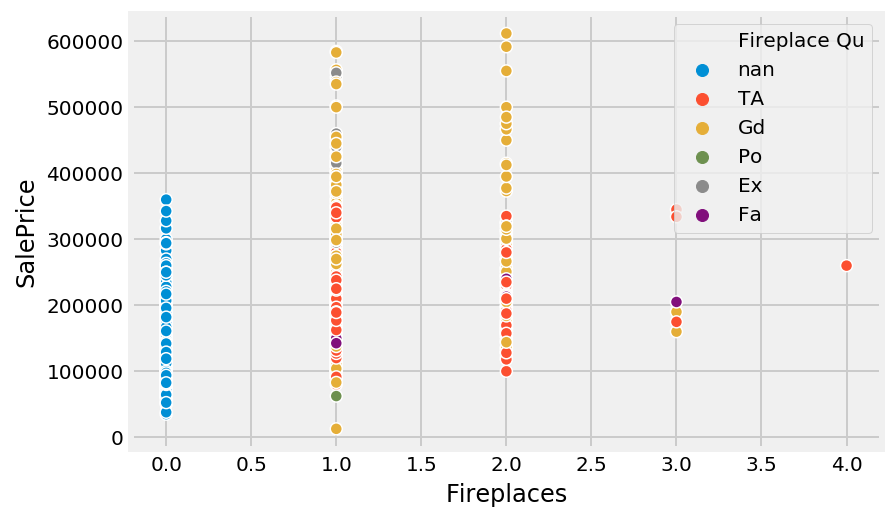

In [29]:
sns.scatterplot(x='Fireplaces',y='SalePrice',hue=train_df['Fireplace Qu'].astype(str),data=train_df)

# propeties with fireplaces = 0 has not 'Fireplace Qu' value - will convert this col into numeric value that include nan

##### To understand missing value - Garage related cols

Based on the data description, NA in Garage related cols means 'No Garage'
This can be verified by the plot below: group NA has Garage Area = 0

Affected Col: Garage Cond, Garage Finish, Garage Qual, Garage Type, Garage Yr Blt 

Garage Yr Blt
* Assign to 0 , so the age of the garage is as old as it could be (assuming older, the less value)

Garage Cond, Garage Finish, Garage Qual, Garage Type,
* Convert them to numerical values

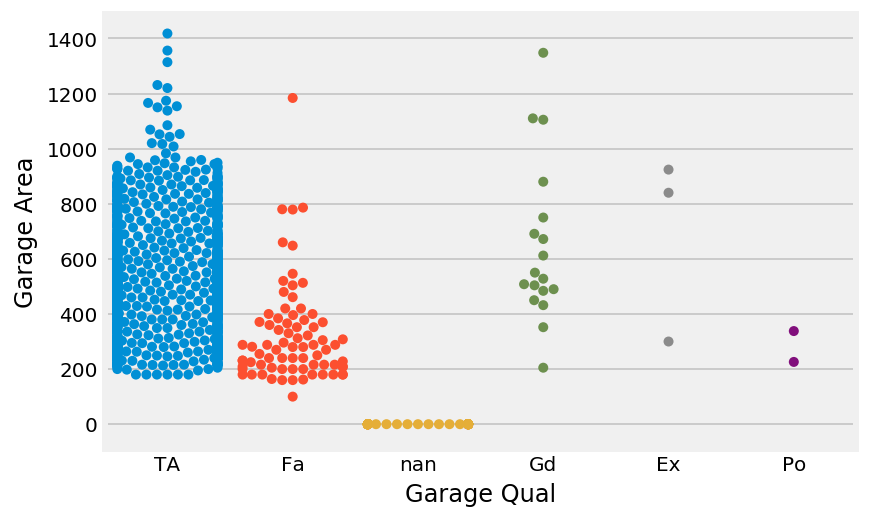

In [30]:
sns.swarmplot(y='Garage Area',x=train_df['Garage Qual'].astype(str),data=train_df)
plt.savefig('../images/Garage_Qual.png')

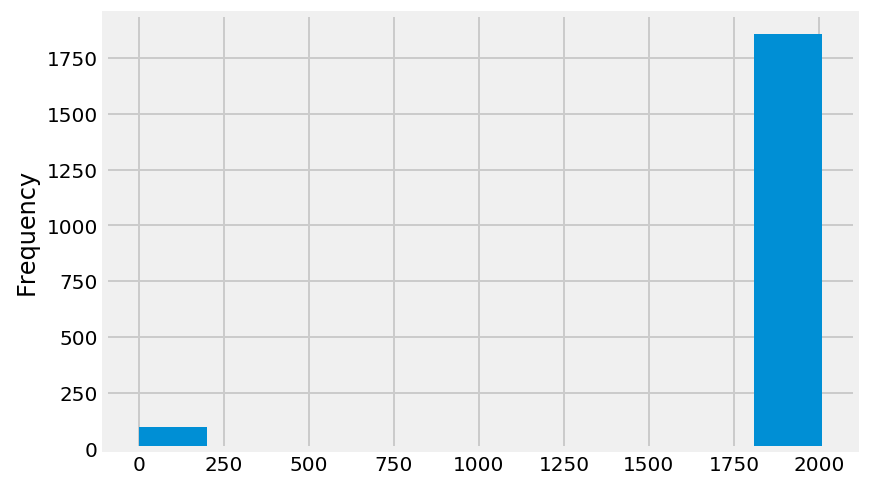

In [31]:
# fill value 0 to year built
train_df['Garage Yr Blt'].fillna(0,inplace=True)
train_df['Garage Yr Blt'].plot(kind='hist')

In [32]:
train_df.head()

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170          60        RL           NaN     13517   Pave   
1  544  531379050          60        RL          43.0     11492   Pave   
2  153  535304180          20        RL          68.0      7922   Pave   
3  318  916386060          60        RL          73.0      9802   Pave   
4  255  906425045          50        RL          82.0     14235   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             

##### To understand missing value - 'Lot Frontage'

In [33]:
# Does 'Street' has any obvious relationship with 'Lot Frontage'?
train_df['Street'].value_counts()

Pave    1948
Grvl       3
Name: Street, dtype: int64

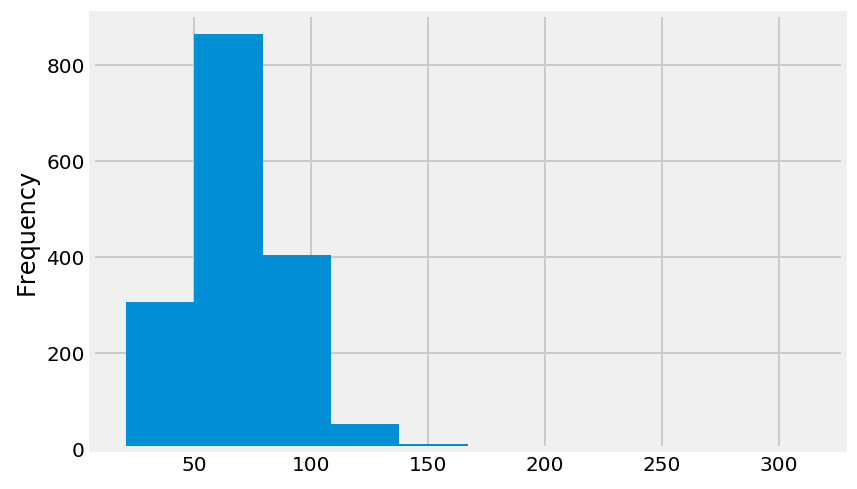

In [34]:
train_df['Lot Frontage'].plot(kind='hist')

In [35]:
train_df[train_df['Lot Frontage'].isnull()]

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170          60        RL           NaN     13517   Pave   
7      145  535154050          20        RL           NaN     12160   Pave   
8     1942  535353130          20        RL           NaN     15783   Pave   
23      12  527165230          20        RL           NaN      7980   Pave   
27    1534  909277040          50        RL           NaN     11700   Pave   
...    ...        ...         ...       ...           ...       ...    ...   
2016   560  532376110          20        RL           NaN      7791   Pave   
2022  2872  909475020          20        RL           NaN     16381   Pave   
2028  2526  534127190          20        RL           NaN     20781   Pave   
2031    25  527402250          20        RL           NaN     12537   Pave   
2047   785  905377130          30        RL           NaN     12342   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0          IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
7          IR1          Lvl    AllPub     Inside        Gtl        NAmes   
8          Reg          Lvl    AllPub     Inside        Gtl      OldTown   
23         IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
27         IR1          HLS    AllPub     Inside        Mod      Crawfor   
...        ...          ...       ...        ...        ...          ...   
2016       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2022       IR1          Lvl    AllPub     Inside        Gtl      Crawfor   
2028       IR2          Lvl    AllPub    CulDSac        Gtl       NWAmes   
2031       IR1          Lvl    AllPub    CulDSac        Gtl        NAmes   
2047       IR1          Lvl    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0           RRAe        Norm      1Fam      2Story             6   
7           Norm        Norm      1Fam      1Story             5   
8         Artery        Norm      1Fam      1Story             5   
23          Norm        Norm      1Fam      1Story             6   
27          Norm        Norm      1Fam      1.5Fin             5   
...          ...         ...       ...         ...           ...   
2016        RRAe        Norm      1Fam      1Story             5   
2022        Norm        Norm      1Fam      1Story             6   
2028        PosN        Norm      1Fam      1Story             7   
2031        Norm        Norm      1Fam      1Story             5   
2047        Norm        Norm      1Fam      1Story             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                8        1976            2005      Gable   CompShg   
7                5        1959            1959        Hip   CompShg   
8                5        1952            1952      Gable   CompShg   
23               7        1992            2007      Gable   CompShg   
27               6        1937            1995      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2016             8        1963            1995      Gable   CompShg   
2022             5        1969            1969      Gable   CompShg   
2028             7        1968            2003        Hip   CompShg   
2031             6        1971            2008      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
7         Plywood      Plywood      BrkFace         180.0         TA   
8         Wd Sdng      Wd Sdng         None           0.0         TA   
23        HdBoard      HdBoard         None           0.0         TA   
27        WdShing      Wd Shng         None           0.0         TA   
...           ...          ...          ...           ..

In [36]:
train_df['Lot Frontage'].mean()

68.89486552567237

In [37]:
# Can't see any obvious correlation with other variable, will fill missing value with mean
impu = train_df['Lot Frontage'].mean()
train_df['Lot Frontage'].fillna(int(impu),inplace=True)

In [38]:
print(train_df.shape)
train_df.isnull().sum()

(1951, 78)


Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 78, dtype: int64

##### **End of cleaning missing data **

## 3. EDA

##### Explore sale price 

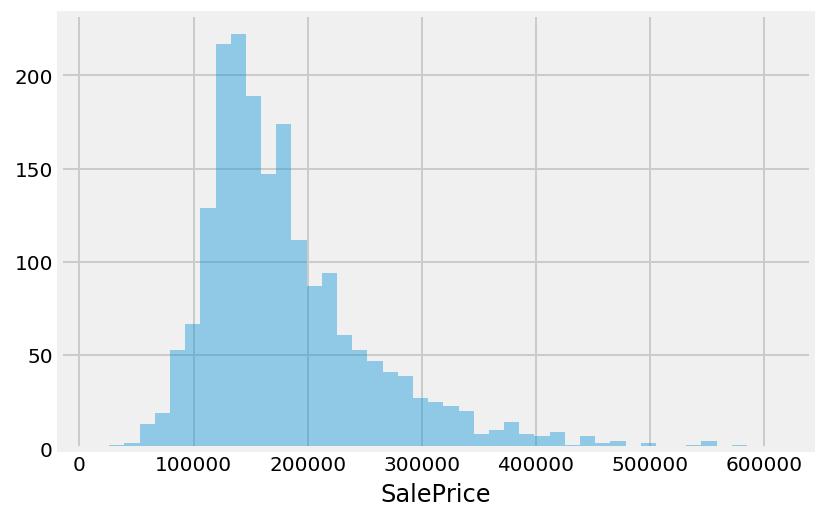

In [39]:
sns.distplot(train_df['SalePrice'],kde=False)
plt.savefig('../images/saleprice_dist.png')

# the SalePrice is not normall distributed as it's right skew
# A long tail to the right (we have expensive properties - outliers)

In [40]:
#sns.distplot(np.log(train_df['SalePrice']),kde=False)

In [41]:
#train_df['yr_sold_str']='yr_'+train_df['Yr Sold'].astype(str)
#train_df['yr_sold_str'].value_counts()
#train_df.drop(columns='yr_sold_str',inplace=True)
#train_df['Kitchen Qual']

In [42]:
#train_df.head()

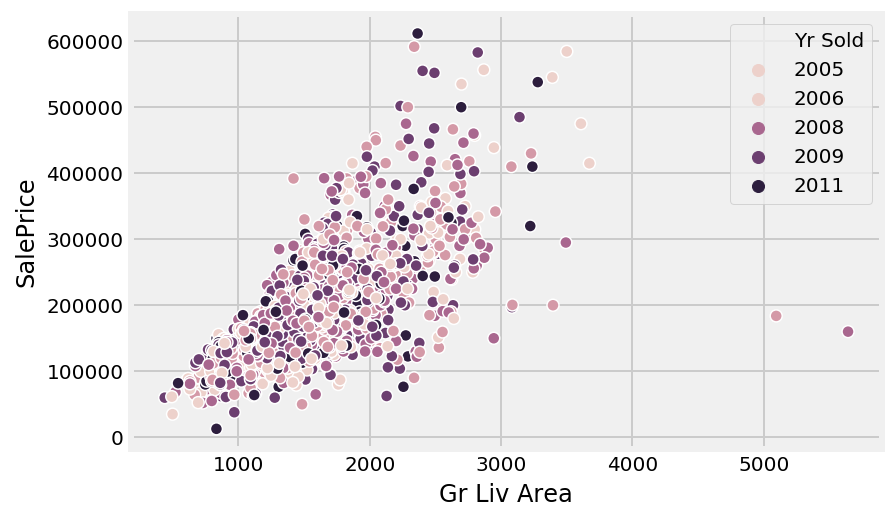

In [43]:
sns.scatterplot(x='Gr Liv Area',hue='Yr Sold',y='SalePrice',data=train_df)

# Gr Liv Area is a good predictor for sale price, but noticed outliers to the right, very big house, but sold at low price

#### Drop unusual rows ('Gr Liv Area')

In [44]:
def bivar_scatter (x,y):
    sns.regplot(x,y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)

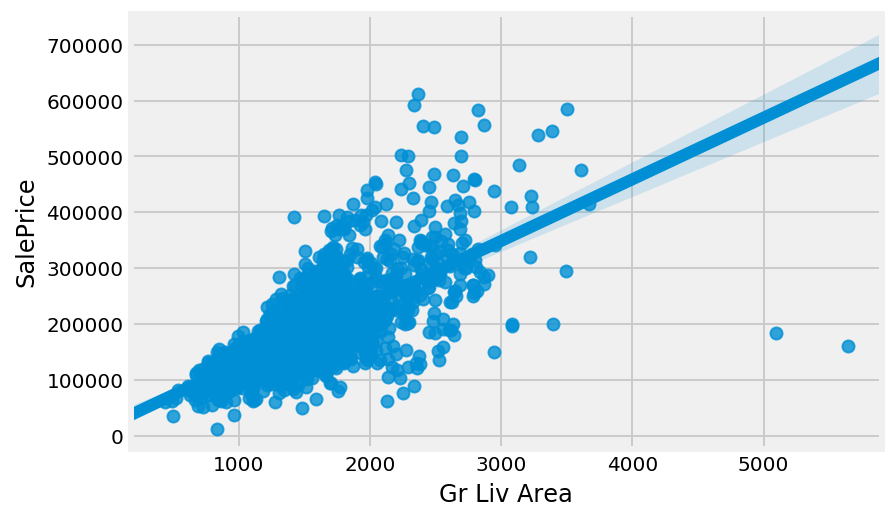

In [45]:
bivar_scatter(train_df['Gr Liv Area'],train_df['SalePrice'])
plt.savefig('../images/LivArea_vs_saleprice_scatt.png')
# there are two very large houses sold at very low sales price, they're the outliers which don't represent the majority
# to prevent it from skewing the model, remove them
# Also, as the houe get bigger, the saleprice variance get bigger too.  It suggests that none-homogeous factors in place.

In [46]:
# Drop large houses with lower sales price
train_df[train_df['Gr Liv Area'] >4000]

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
960   1499  908154235          60        RL         313.0     63887   Pave   
1885  2181  908154195          20        RL         128.0     39290   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
960        IR3          Bnk    AllPub     Corner        Gtl      Edwards   
1885       IR1          Bnk    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
960        Feedr        Norm      1Fam      2Story            10   
1885        Norm        Norm      1Fam      1Story            10   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
960        Stucco       Stucco        Stone         796.0         Ex   
1885      CemntBd      CmentBd        Stone        1224.0         Ex   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
960          TA      PConc        Ex        TA            Gd            GLQ   
1885         TA      PConc        Ex        TA            Gd            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
960         5644.0            Unf           0.0        466.0         6110.0   
1885        4010.0            Unf           0.0       1085.0         5095.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
960     GasA         Ex           Y      SBrkr        4692         950   
1885    GasA         Ex           Y      SBrkr        5095           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
960                 0         5642             2.0             0.0          2   
1885                0         5095             1.0             1.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
960           1              3              1           Ex             12   
1885          1              2              1           Ex             15   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
960         Typ           3           Gd      Attchd         2008.0   
1885        Typ           2           Gd      Attchd         2008.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
960            Fin          2.0       1418.0          TA          TA   
1885           Fin          3.0       1154.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
960            Y           214            292               0           0   
1885           Y           546            484               0           0   

      Screen Porch  Pool Area Fence  Misc Val  Mo Sold  Yr Sold Sale Type  \
960              0        480   NaN         0        1     2008       New   
1885             0          0   NaN     17000       10     2007       New   

      SalePrice  
960      160000  
1885     183850

In [47]:
train_df.drop([960,1885], inplace=True)

In [48]:
# Verify they are gone
print(train_df.shape)
train_df[train_df['Gr Liv Area'] >4000]

(1949, 78)


Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

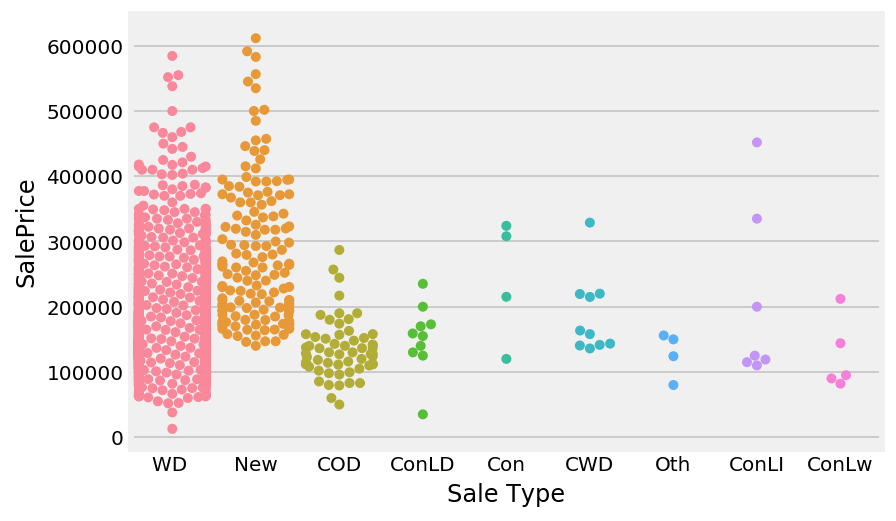

In [49]:
sns.swarmplot(train_df['Sale Type'],train_df['SalePrice'])

# New house generally fetch higher price, COD (Court Officer Deed/Estate): a small amount, and saling price is generally lower

### Using Common sense to select variables that affects sale price:
Intuitively, the following factors matter when buying a house:
* On the unit:
       How big is the house: Lot Area, Gr Liv Area
       How old is the house: age (2020 - Year Built)
       WHat's the house condition? -> hse_cond (Overall Qual,Overall Cond, Exter Qual, Exter Cond,Functional)
       Does it have a Central Air -> create dummy (Y/N)'central_aircon'
       Does it have a fireplace? -> 'Fireplaces' 'Fireplace Qu'
       How big is the garage? (How many cars can be parked?) -> 'Garage Cars'
       How many bedrooms? -> Bedroom AbvGr
       How many bathrooms? -> total_baths (Full Bath + Half Bath*0.5)
       How is the Kitchen> -> dummy from 'Kitchen Qual'
       Is the basement finished? -> 'bsmt_cond_num', or bsmt_gen_cond (BsmtFinType 1, BsmtFinType 2, Bsmt Cond, Bsmt Qual)
       How big is the basement? -> Total Bsmt SF, or bsmt_fin_sf (BsmtFin SF 1 + BsmtFin SF 2)
    
* Surrounding
       Neighborhood -> not much helpful without knowing the neighbornood condition though
       MS Zoning -> create dummy for residential density 
       Condition 1, Condition 2  -> create dummy for: artery_st,feeder_st, railroad, park
   
Based on the above consideration, relative variables are selected as the baseline feature for modeling. 

 feature_base = ['Lot Area', 'Gr Liv Area','age','central_aircon','hse_cond','Garage Cars',\
                'fireplace_qu_num','Fireplaces','Bedroom AbvGr','total_baths',\
               'kitchen_qual_num','bsmt_cond_num','artery_st','feeder_st','railroad','park']

Physical features such as garage, basement, and house have multiple variables desribing their quality/conditions, a combined variable to be created to descibe them: `'hse_cond'` (Overall Qual,Overall Cond, Exter Qual, Exter Cond,Functional) `'garage_cond`'  combine: Garage Cond, Garage Finish, Garage Qual 
`'bsmt_gen_cond'` combine: BsmtFinType 1, BsmtFinType 2, Bsmt Cond, Bsmt Qual

#### Engineer the cols

In [50]:
# map the quality rating
#map_qu_nan = {'Ex': 6,'Gd':5, 'TA':4,'Fa':3,'Po':2, 'nan':1}
#map_garage_finish = {'Fin':4,'RFn':3,'Unf':2, 'nan':1}
#map_functional = {'Typ':8, 'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1}
#map_bsmt_fin = {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1}
#map_driveway = {'Y':3,'P':2,'N':1}

##### Engineering ordinal variables:

In [51]:
eng_ord_cols = ['Fireplace Qu','Garage Cond', 'Garage Finish', 'Garage Qual',\
                'Exter Qual','Exter Cond','Functional'\
                'Kitchen Qual', 'Bsmt Cond','Bsmt Qual','BsmtFinType 1', 'BsmtFinType 2',\
           ]
eng_norminal_cols = ['Garage Type','MS Zoning', 'artery_st','feeder_st', 'railroad', 'park']

train_df['fireplace_qu_num'] = train_df['Fireplace Qu'].astype(str).map(lambda x: map_qu_nan[x])
train_df['garage_cond_num'] = train_df['Garage Cond'].astype(str).map(lambda x: map_qu_nan[x])
train_df['garage_finish_num'] = train_df['Garage Finish'].astype(str).map(lambda x: map_garage_finish[x])
train_df['garage_qual_num'] = train_df['Garage Qual'].astype(str).map(lambda x: map_qu_nan[x])

In [52]:
# Create a function to check the contens in the categorical variable
def check_col_grps(col_list):
    for i in col_list:
        print(train_df[i].astype(str).value_counts())

In [53]:
# Create a function to convert ordinal variable to numeric
def ordinal_to_num_col(col,map):
    col_name = col.lower().replace(' ','_') + "_num"
    train_df[col_name] = train_df[col].astype(str).map(lambda x: map[x])
    print(col_name, "created")

In [54]:
check_col_grps(['Condition 1', 'Condition 2'])

Norm      1686
Feedr       94
Artery      68
RRAn        33
PosN        27
RRAe        20
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64
Norm      1924
Feedr       10
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64


In [55]:
# From 'Condition 1' and 'Condition 2'
# create dummy cols for artery_st(artery) , feeder_st(feedr), railroad(RRAn,RRAe,RRNn,RRNe), park (PosN,PosA)
# for any feature: if a loc has the same features in both cols, it'll be given higher weightage (2)

# Example below: locs with 'Artery' and 'Artery', it will have higher weightage (2) than other loc with 'Artery'(1)
train_df[(train_df['Condition 1'] == 'Artery')&(train_df['Condition 2'] =='Artery')]

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
258    651  535353140         190        RL         107.0     10615   Pave   
1974  1222  534452060         190        RL          50.0      7420   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
258        IR1          Bnk    AllPub     Corner        Mod      OldTown   
1974       Reg          Lvl    AllPub     Corner        Gtl      BrkSide   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
258       Artery      Artery    2fmCon      2Story             3   
1974      Artery      Artery    2fmCon      1.5Unf             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
258              5        1900            1970      Gable   CompShg   
1974             6        1939            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
258       HdBoard      HdBoard         None           0.0         TA   
1974      MetalSd      MetalSd         None           0.0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
258          TA     CBlock        Fa        TA            Mn            BLQ   
1974         TA     BrkTil        TA        TA            No            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
258          440.0            Unf           0.0        538.0          978.0   
1974         851.0            Unf           0.0        140.0          991.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
258     GasA         TA           Y      SBrkr        1014         685   
1974    GasA         Ex           Y      SBrkr        1077           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
258                 0         1699             1.0             0.0          2   
1974                0         1077             1.0             0.0          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
258           0              3              2           TA              7   
1974          0              2              2           TA              5   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
258         Typ           0          NaN     CarPort         1920.0   
1974        Typ           2           TA      Attchd         1939.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
258            Unf          2.0        420.0          Fa          Fa   
1974           RFn          1.0        205.0          Gd          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
258            Y             0             74               0           0   
1974           Y             0              4               0           0   

      Screen Porch  Pool Area Fence  Misc Val  Mo Sold  Yr Sold Sale Type  \
258              0          0   NaN         0        8     2009       WD    
1974             0          0   NaN         0        1     2008       WD    

      SalePrice  fireplace_qu_num  garage_cond_num  garage_finish_num  \
258       95000                 1                3                  2   
1974     118000                 4                4                  3   

      garage_qual_num  
258                 3  
1974                5

In [56]:
# create col for 'artery_st'
train_df['artery_st'] = (train_df['Condition 1'] =='Artery').astype(int) + (train_df['Condition 2'] =='Artery').astype(int)

In [57]:
# create col for 'feeder_st'
train_df['feeder_st'] = (train_df['Condition 1'] =='Feedr').astype(int) + (train_df['Condition 2'] =='Feedr').astype(int)

In [58]:
# Create col for 'railroad'
train_df['railroad'] = (train_df['Condition 1'].isin(['RRAn','RRAe','RRNn','RRNe'])).astype(int) \
                     + (train_df['Condition 2'].isin(['RRAn','RRAe','RRNn','RRNe'])).astype(int)

In [59]:
# Create col for 'park'('PosN','PosA')
train_df['park'] = (train_df['Condition 1'].isin(['PosN','PosA'])).astype(int) \
                 + (train_df['Condition 2'].isin(['PosN','PosA'])).astype(int)

In [60]:
train_df['artery_st'].value_counts()

0    1878
1      69
2       2
Name: artery_st, dtype: int64

In [61]:
train_df.feeder_st.value_counts()

0    1846
1     102
2       1
Name: feeder_st, dtype: int64

In [62]:
train_df.railroad.value_counts()

0    1883
1      66
Name: railroad, dtype: int64

In [63]:
train_df.park.value_counts()

0    1909
1      35
2       5
Name: park, dtype: int64

In [64]:
check_col_grps(['Exter Qual'])

TA    1185
Gd     669
Ex      78
Fa      17
Name: Exter Qual, dtype: int64


In [65]:
# create numeric col for 'Exter Qual'
ordinal_to_num_col('Exter Qual',map_qu_nan)

exter_qual_num created


In [66]:
check_col_grps(['Exter Qual'])

TA    1185
Gd     669
Ex      78
Fa      17
Name: Exter Qual, dtype: int64


In [67]:
check_col_grps(['Exter Cond'])

TA    1692
Gd     211
Fa      38
Ex       7
Po       1
Name: Exter Cond, dtype: int64


In [68]:
# create numeric col for 'Exter Cond'
ordinal_to_num_col('Exter Cond',map_qu_nan)

exter_cond_num created


In [69]:
check_col_grps(['Exter Cond'])

TA    1692
Gd     211
Fa      38
Ex       7
Po       1
Name: Exter Cond, dtype: int64


In [70]:
check_col_grps(['Functional'])

Typ     1833
Min1      38
Min2      36
Mod       22
Maj1      11
Maj2       6
Sev        2
Sal        1
Name: Functional, dtype: int64


In [71]:
# create numeric col for 'Functional'
ordinal_to_num_col('Functional',map_functional)

functional_num created


In [72]:
check_col_grps(['functional_num'])

8    1833
7      38
6      36
5      22
4      11
3       6
2       2
1       1
Name: functional_num, dtype: int64


In [73]:
train_df.head(1)

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170          60        RL          68.0     13517   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   

   Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
0              1           Gd              6        Typ           0   

  Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
0          NaN      Attchd         1976.0           RFn          2.0   

   Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
0        475.0          TA          TA           Y             0   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Fence  \
0             44               0           0             0          0   NaN   

   Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  fireplace_qu_num  \
0         0        3     2010       WD      130500                 1   

   garage_cond_num  garage_finish_num  garage_qual_num  artery_st  feeder_st  \
0                4                  3                4          0          0   

   railroad  park  exter_qual_num  exter_cond_num  functional_num  
0         1     0               5               4               8

In [74]:
check_col_grps(['Kitchen Qual', 'Bsmt Cond','Bsmt Qual','BsmtFin Type 1', 'BsmtFin Type 2'])

TA    987
Gd    779
Ex    144
Fa     39
Name: Kitchen Qual, dtype: int64
TA    1793
Gd      87
Fa      61
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64
TA    871
Gd    845
Ex    175
Fa     58
Name: Bsmt Qual, dtype: int64
GLQ    600
Unf    577
ALQ    291
BLQ    199
Rec    180
LwQ    102
Name: BsmtFin Type 1, dtype: int64
Unf    1704
Rec      80
LwQ      60
BLQ      48
ALQ      34
GLQ      23
Name: BsmtFin Type 2, dtype: int64


In [75]:
ordinal_to_num_col('Kitchen Qual',map_qu_nan)
ordinal_to_num_col('Bsmt Cond',map_qu_nan)
ordinal_to_num_col('Bsmt Qual',map_qu_nan)
ordinal_to_num_col('BsmtFin Type 1',map_bsmt_fin)
ordinal_to_num_col('BsmtFin Type 2',map_bsmt_fin)

kitchen_qual_num created
bsmt_cond_num created
bsmt_qual_num created
bsmtfin_type_1_num created
bsmtfin_type_2_num created


In [76]:
check_col_grps(['kitchen_qual_num', 'bsmt_cond_num','bsmt_qual_num','bsmtfin_type_1_num','bsmtfin_type_2_num'])

4    987
5    779
6    144
3     39
Name: kitchen_qual_num, dtype: int64
4    1793
5      87
3      61
2       5
6       3
Name: bsmt_cond_num, dtype: int64
4    871
5    845
6    175
3     58
Name: bsmt_qual_num, dtype: int64
7    600
2    577
6    291
5    199
4    180
3    102
Name: bsmtfin_type_1_num, dtype: int64
2    1704
4      80
3      60
5      48
6      34
7      23
Name: bsmtfin_type_2_num, dtype: int64


In [77]:
# Create numeric col for 'Central Air'
check_col_grps(['Central Air'])

Y    1842
N     107
Name: Central Air, dtype: int64


In [78]:
train_df['central_aircon'] = (train_df['Central Air']=='Y').astype(int)
check_col_grps(['central_aircon'])

1    1842
0     107
Name: central_aircon, dtype: int64


In [79]:
# Create numeric cols from numeric cols
new_num_cols = ['artery_st','feeder_st','railroad','park','age',\
                'age_remod', 'total_baths','hse_cond','garage_cond',]

train_df['age'] = 2020 - train_df['Year Built']
train_df['age_remod'] = 2020 - train_df['Year Remod/Add']
train_df['total_baths'] = train_df['Full Bath'] + 0.5* train_df['Half Bath']
train_df['bsmt_fin_sf'] = train_df['BsmtFin SF 1'] + train_df['BsmtFin SF 2']

train_df['hse_cond'] = round( train_df['Overall Qual']/train_df['Overall Qual'].mean() \
                             + train_df['Overall Cond']/train_df['Overall Cond'].mean()\
                             + train_df['exter_qual_num']/train_df['exter_qual_num'].mean()\
                             + train_df['exter_cond_num']/train_df['exter_cond_num'].mean() \
                             + train_df['functional_num']/train_df['functional_num'].mean() \
                             ,2)
train_df['garage_cond'] = round( train_df['garage_qual_num']/train_df['garage_qual_num'].mean()\
                                + train_df['garage_cond_num']/train_df['garage_cond_num'].mean()  \
                                + train_df['garage_finish_num']/train_df['garage_finish_num'].mean()\
                                ,2)
train_df['bsmt_gen_cond'] = round( train_df['bsmt_cond_num']/train_df['bsmt_cond_num'].mean()\
                                  + train_df['bsmt_qual_num']/train_df['bsmt_qual_num'].mean()  \
                                  + train_df['bsmtfin_type_1_num']/train_df['bsmtfin_type_1_num'].mean()\
                                  + train_df['bsmtfin_type_2_num']/train_df['bsmtfin_type_2_num'].mean()
                                ,2)
train_df.head()

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170          60        RL          68.0     13517   Pave   
1  544  531379050          60        RL          43.0     11492   Pave   
2  153  535304180          20        RL          68.0      7922   Pave   
3  318  916386060          60        RL          73.0      9802   Pave   
4  255  906425045          50        RL          82.0     14235   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             

### Explore numerical variables - heatmap and corr()

In [80]:
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(train_df.corr())
mask[np.triu_indices_from(mask)] = True

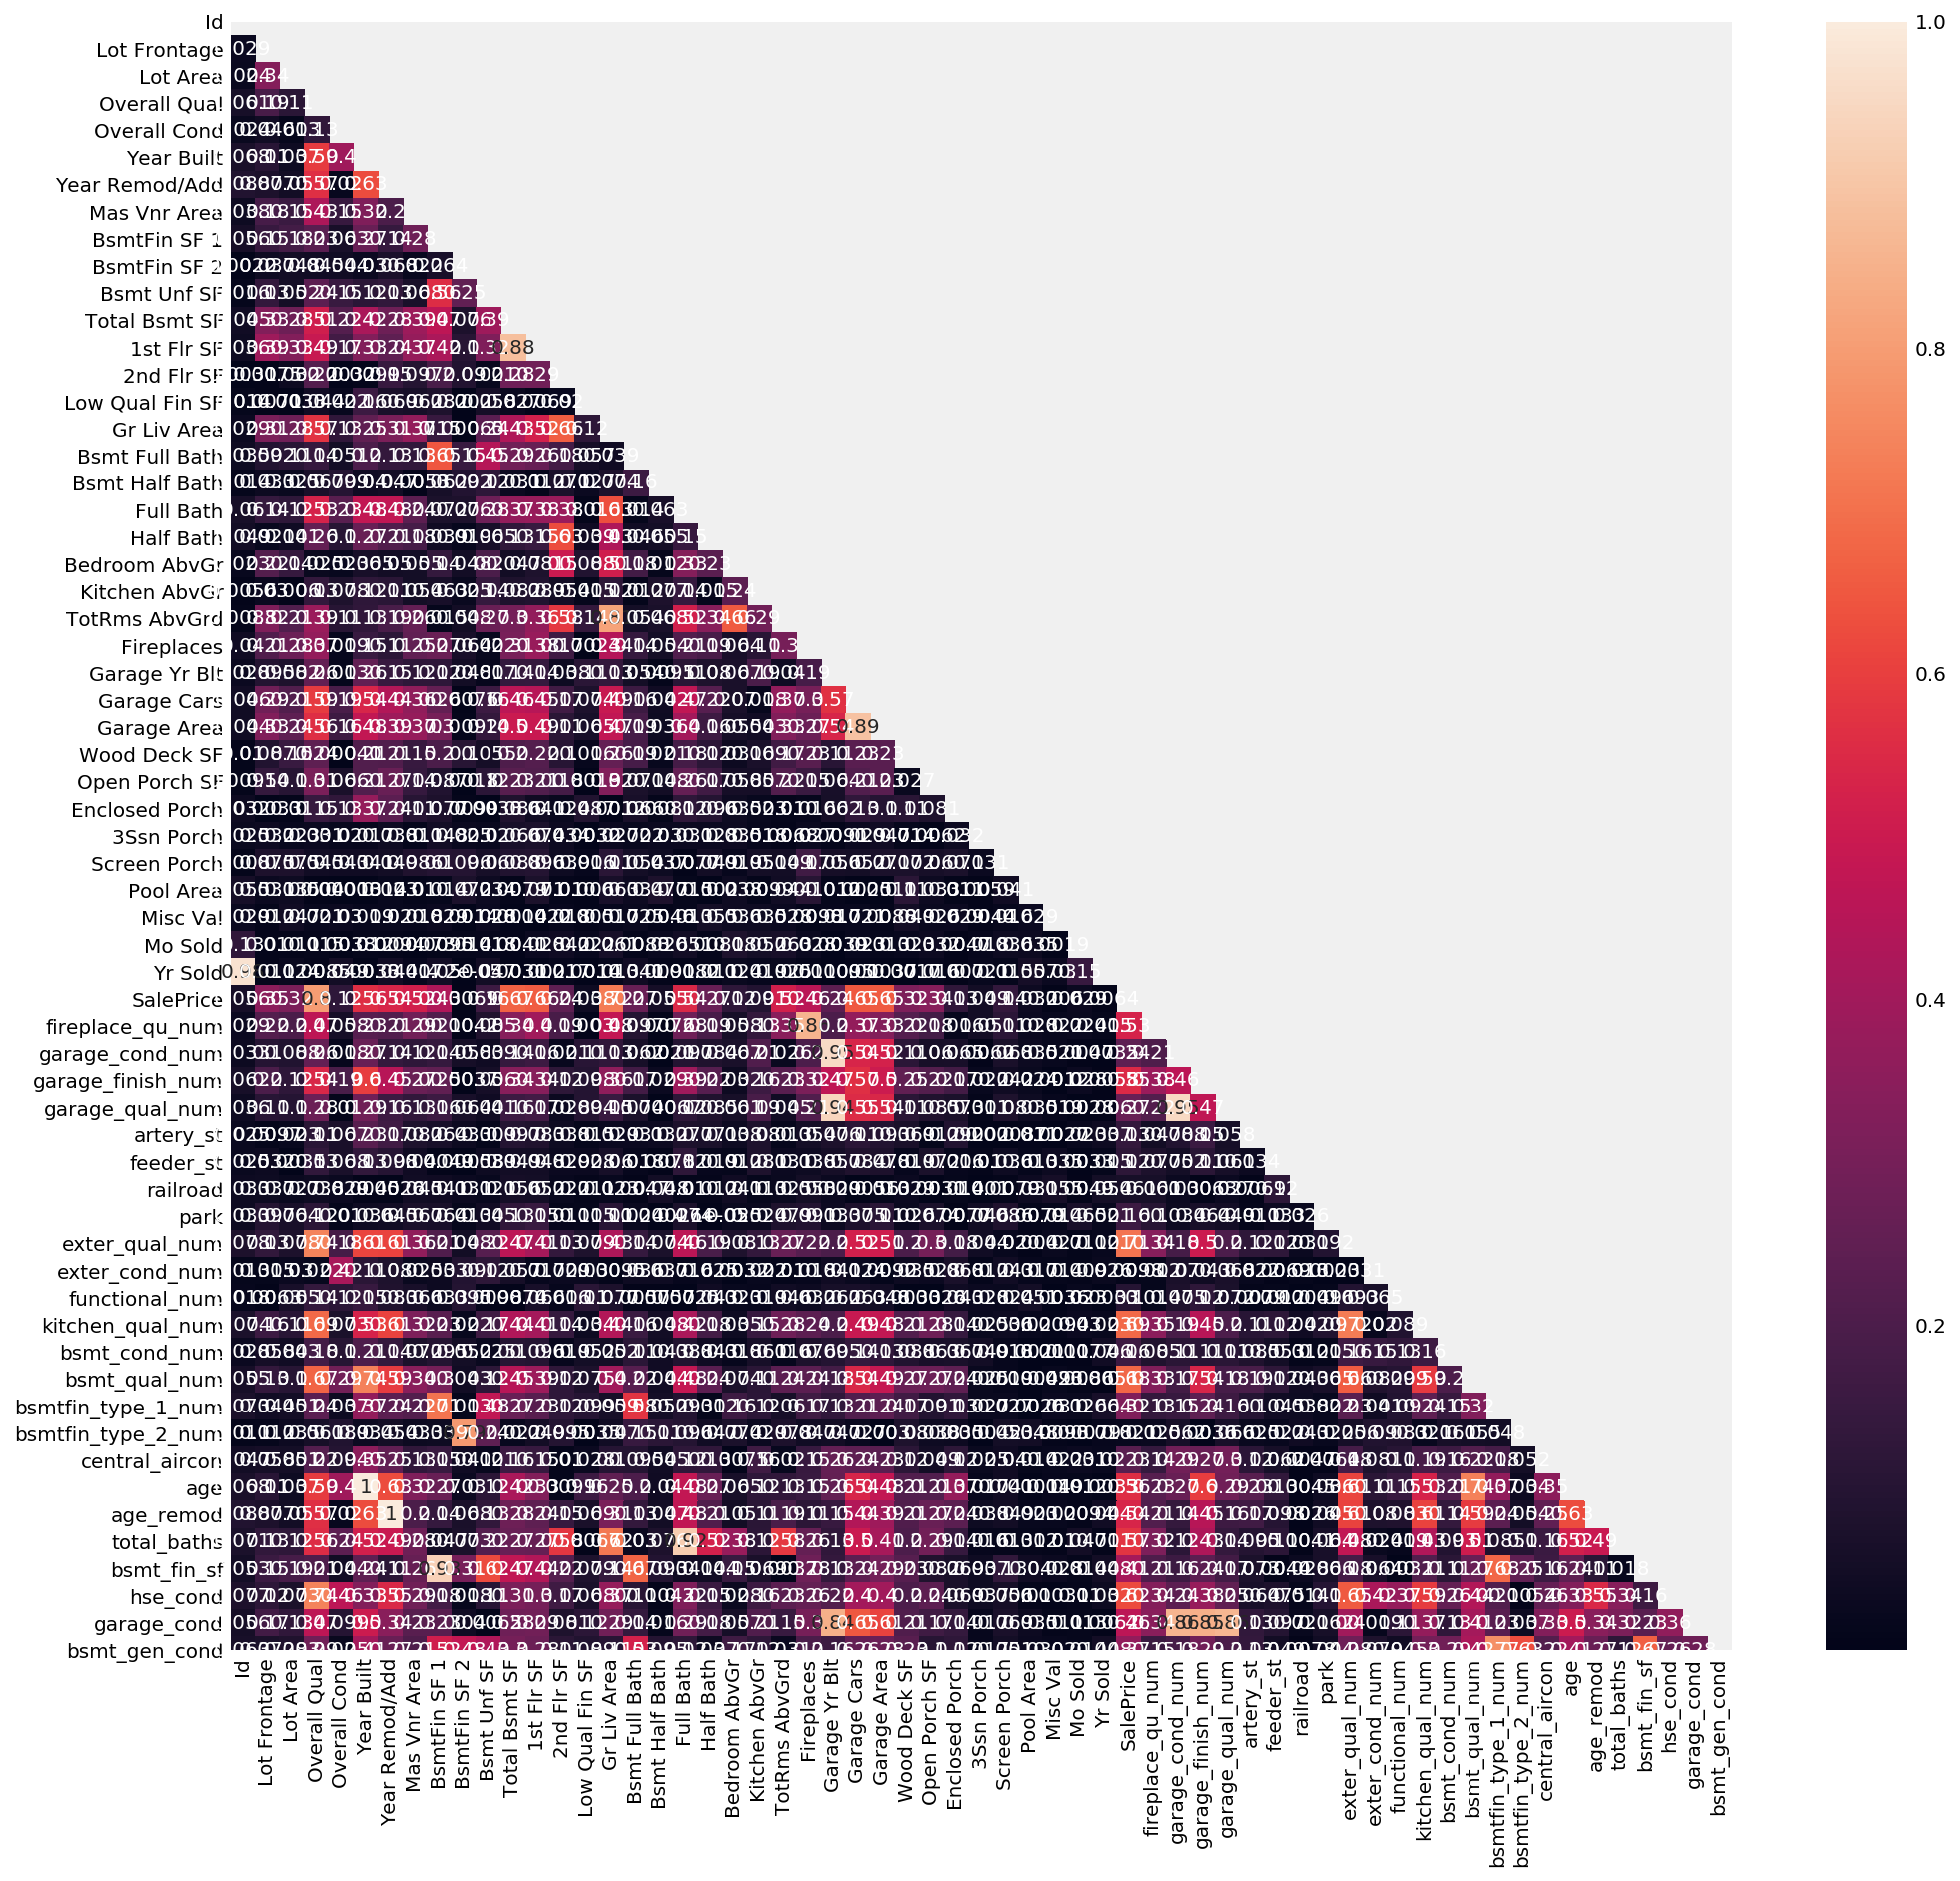

In [81]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(abs(train_df.corr()),mask=mask,annot=True)

# look for variables that have high corr with SalePrice

In [82]:
#sns.scatterplot(x='Bedroom AbvGr',y='TotRms AbvGrd',data=train_df)
#plt.savefig('../images/scatter_BR_vs_totRms.png')

In [83]:
abs(train_df.corr()['SalePrice']).sort_values(ascending=False).head(50)

SalePrice             1.000000
Overall Qual          0.798388
Gr Liv Area           0.723617
exter_qual_num        0.709042
kitchen_qual_num      0.686514
bsmt_qual_num         0.676232
Total Bsmt SF         0.669917
1st Flr SF            0.660007
Garage Area           0.654966
Garage Cars           0.649130
hse_cond              0.623426
total_baths           0.574586
Year Built            0.561034
age                   0.561034
garage_finish_num     0.548530
Full Bath             0.543837
Year Remod/Add        0.535875
age_remod             0.535875
fireplace_qu_num      0.528222
TotRms AbvGrd         0.518971
Mas Vnr Area          0.516628
garage_cond           0.463975
Fireplaces            0.460893
BsmtFin SF 1          0.429944
bsmt_fin_sf           0.412734
bsmt_gen_cond         0.365094
Lot Frontage          0.351375
Open Porch SF         0.341048
bsmtfin_type_1_num    0.320396
Wood Deck SF          0.319526
Lot Area              0.316162
garage_qual_num       0.268803
Half Bat

##### 30 variables have corr abov 0.3.  A good num of engineered cols shown up. It means those cols are relatively important.

* Examinate each variable, there are multicollinear variables in the high corr list
* Variables are grouped by features:

Overall Qual      *    0.798388
exter_qual_num    *    0.709042
hse_cond          *    0.623426 (derived from above 2 variables)

age               *    0.561034
age_remod         *    0.535875

Gr Liv Area       *    0.723617  
1st Flr SF        *    0.660007  (Gr Liv Area include 1st Flr)
Lot Area          *    0.316162  (Lot area include Gr Liv Area and others)
Lot Frontage      *    0.351375
Open Porch SF     *    0.341048
Wood Deck SF          0.319526

kitchen_qual_num  *    0.686514

fireplace_qu_num  *    0.528222
Fireplaces        *    0.460893

Garage Area       *    0.654966
Garage Cars       *    0.649130
garage_finish_num *    0.548530
garage_cond           0.463975 (derived from garage_finish_num)

total_baths       *    0.574586
TotRms AbvGrd     *    0.518971  (surprised that TotRms is more corr to price then 'Bedroom AbvGr'- 0.123049)


Mas Vnr Area          0.516628

Total Bsmt SF     *    0.669917 (this encompass Fin SF)
BsmtFin SF 1          0.429944 (choose one?)
bsmt_fin_sf       *    0.412734 (BsmtFin SF 1 is part of it)
bsmt_gen_cond     *    0.365094 (derived from bsmtfin_type_1_num) 
bsmtfin_type_1_num    0.320396 choose one?


============= selection ===========

Overall Qual      *    0.798388
exter_qual_num    *    0.709042
hse_cond          *    0.623426 
age               *    0.561034
age_remod         *    0.535875
Gr Liv Area       *    0.723617  
1st Flr SF        *    0.660007  
Lot Area          *    0.316162  
Lot Frontage      *    0.351375
Open Porch SF     *    0.341048
kitchen_qual_num  *    0.686514
fireplace_qu_num  *    0.528222
Fireplaces        *    0.460893
Garage Area       *    0.654966
Garage Cars       *    0.649130
garage_finish_num *    0.548530
total_baths       *    0.574586
TotRms AbvGrd     *    0.518971  (surprised that TotRms is more corr to price then 'Bedroom AbvGr'- 0.123049)
Mas Vnr Area          0.516628
Total Bsmt SF     *    0.669917 
bsmt_gen_cond     *    0.365094 

### Selecting features by visually inspecting categorical columns

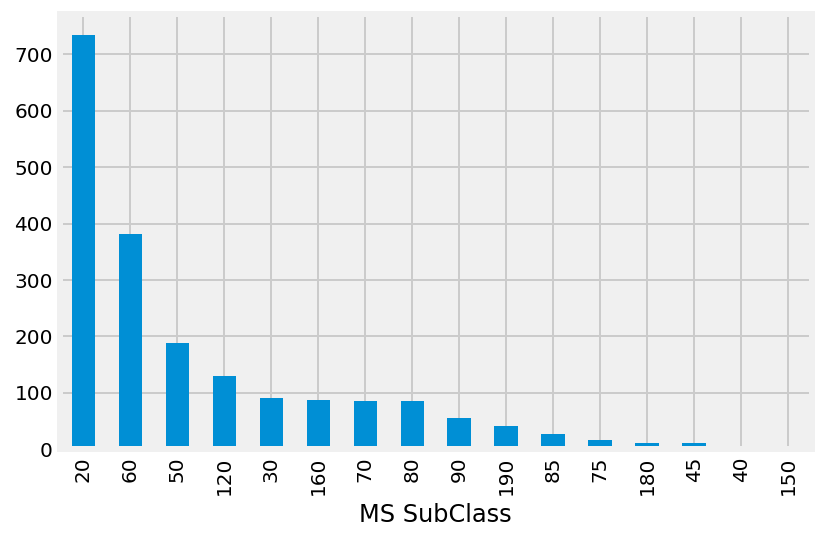

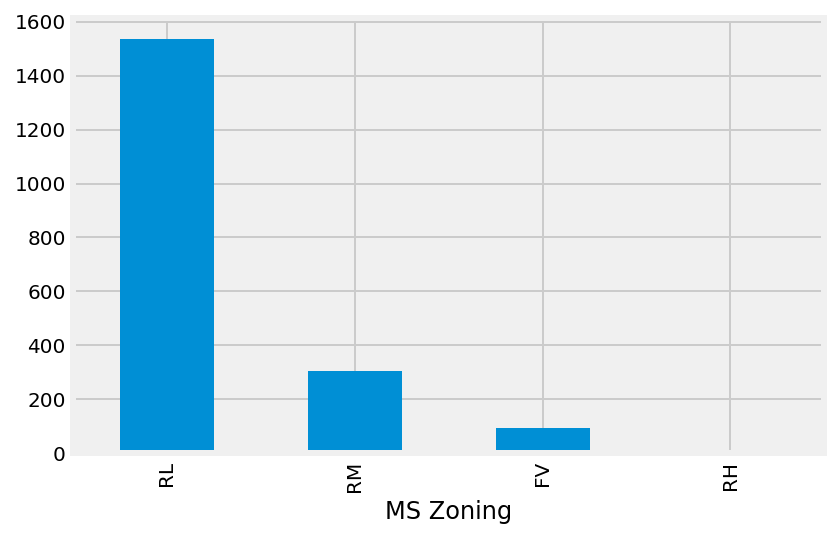

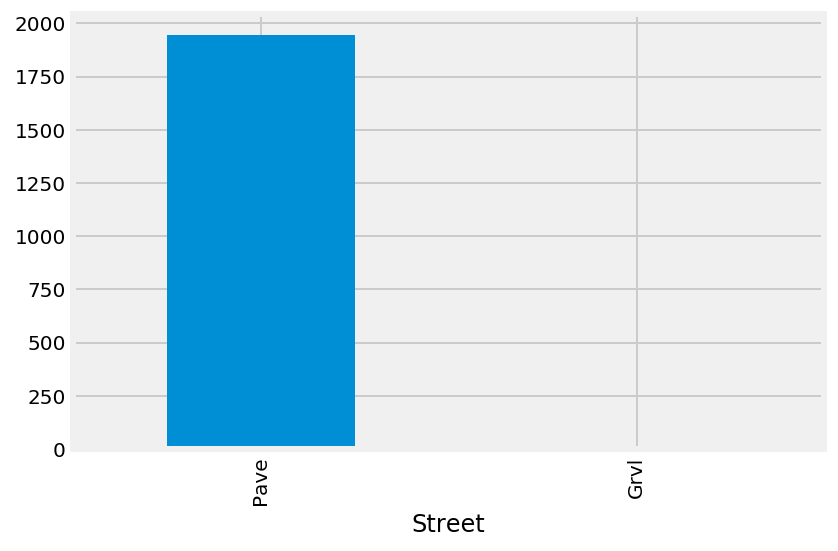

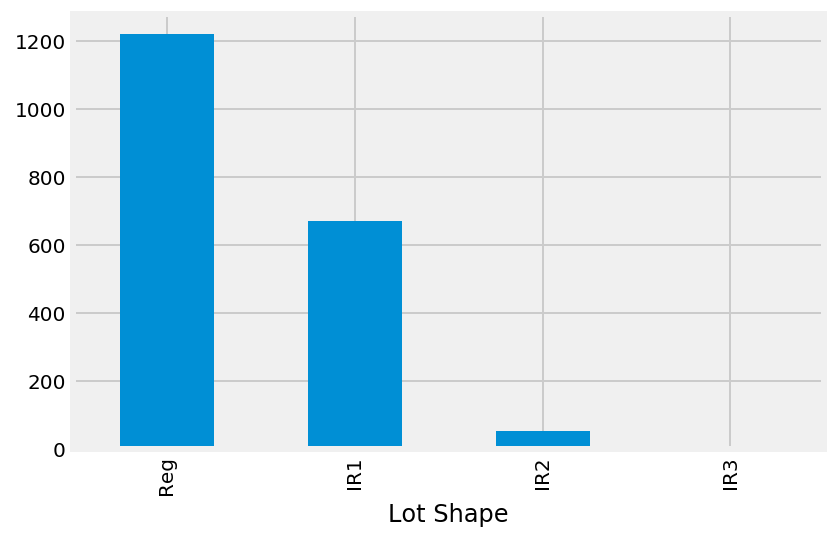

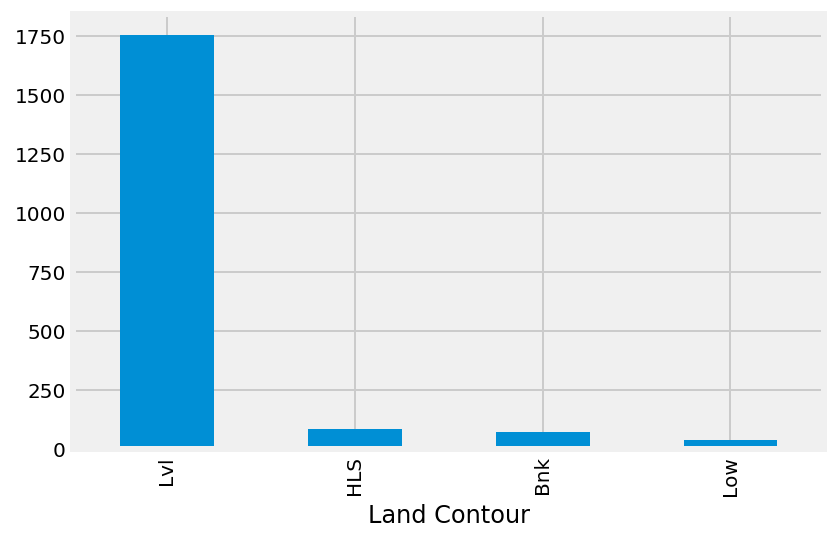

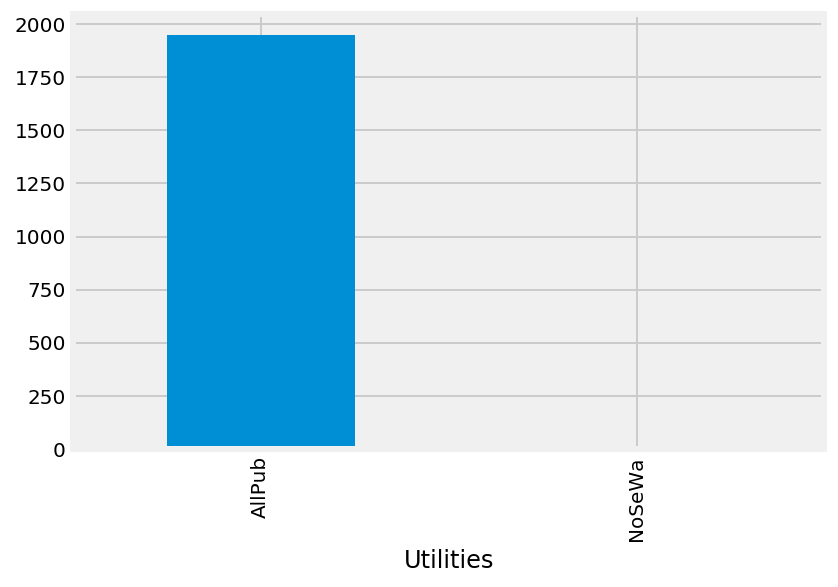

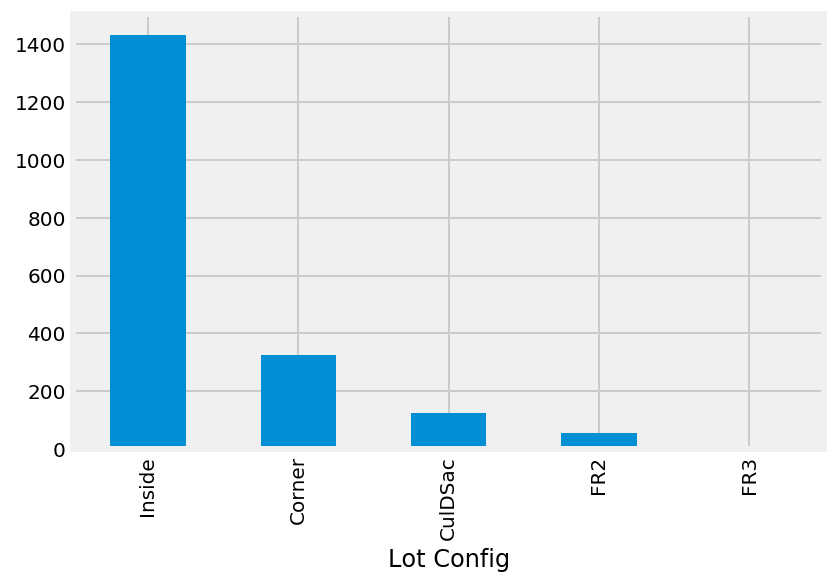

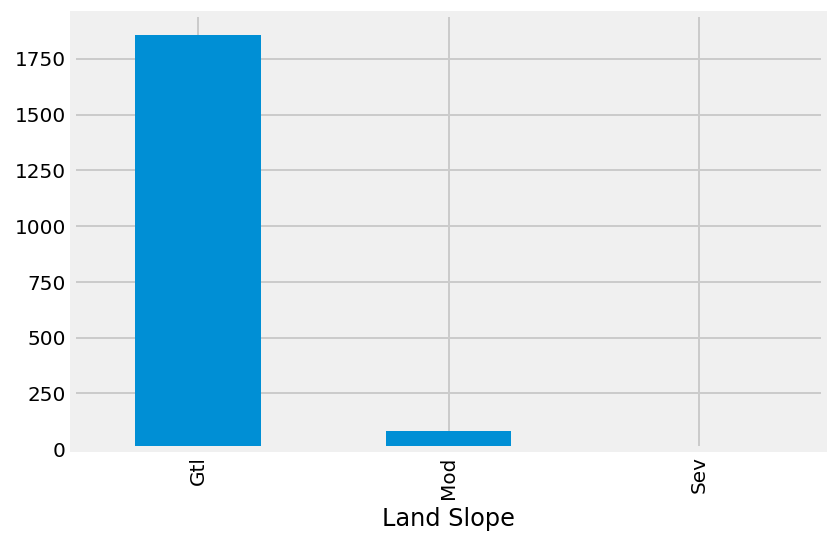

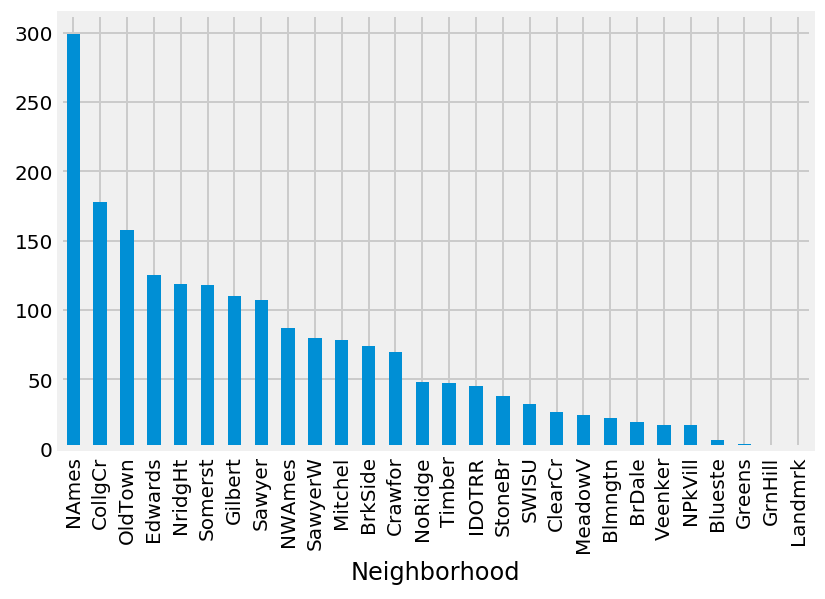

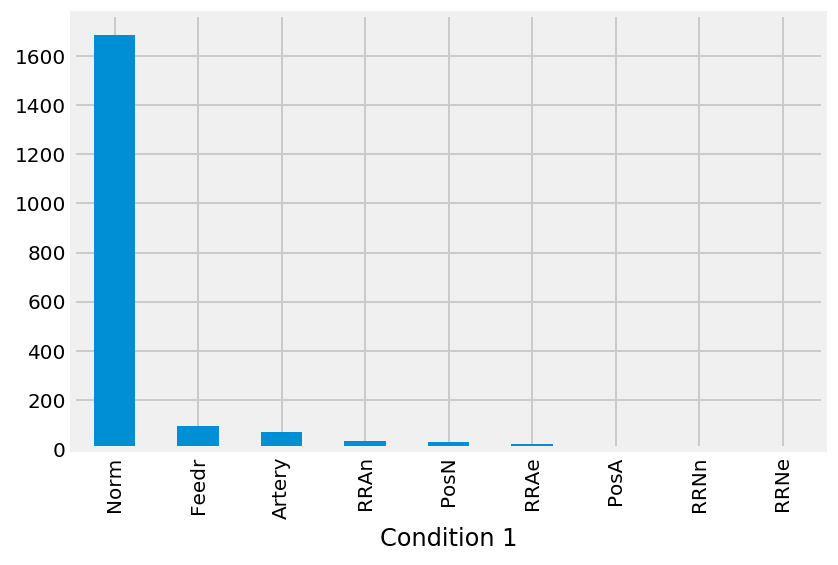

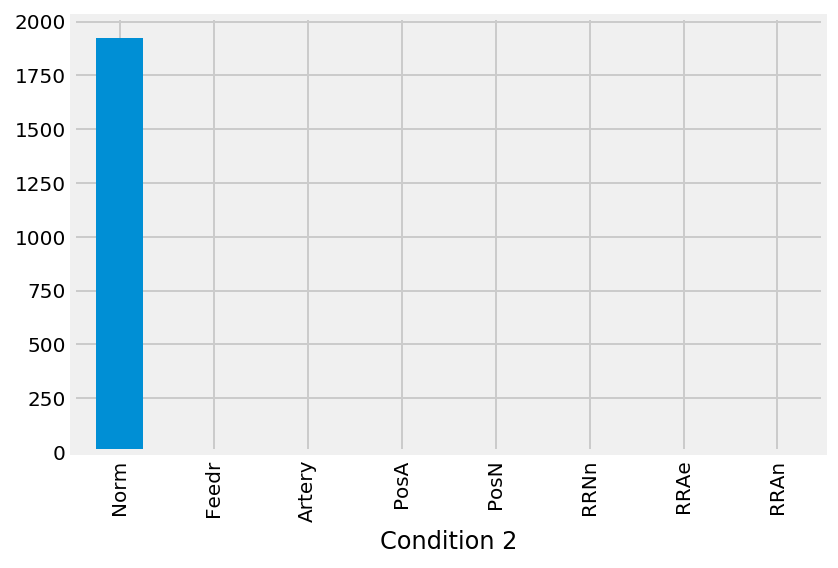

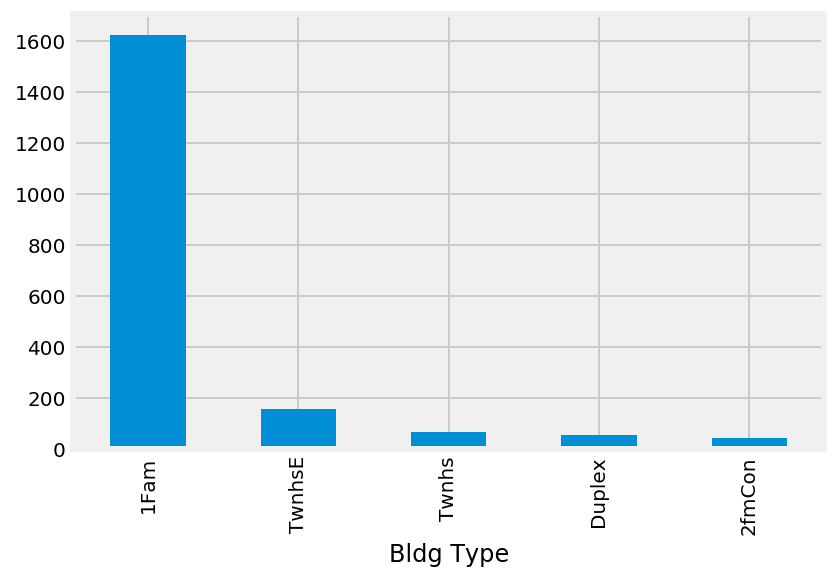

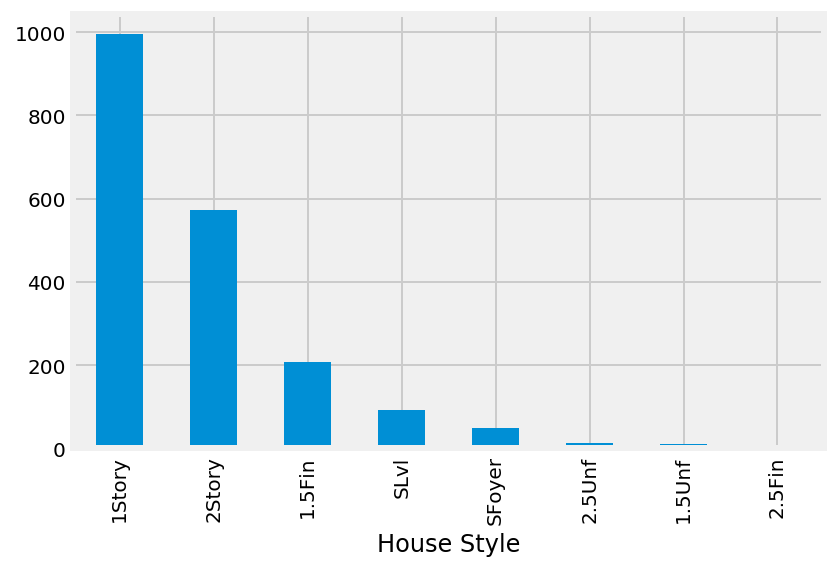

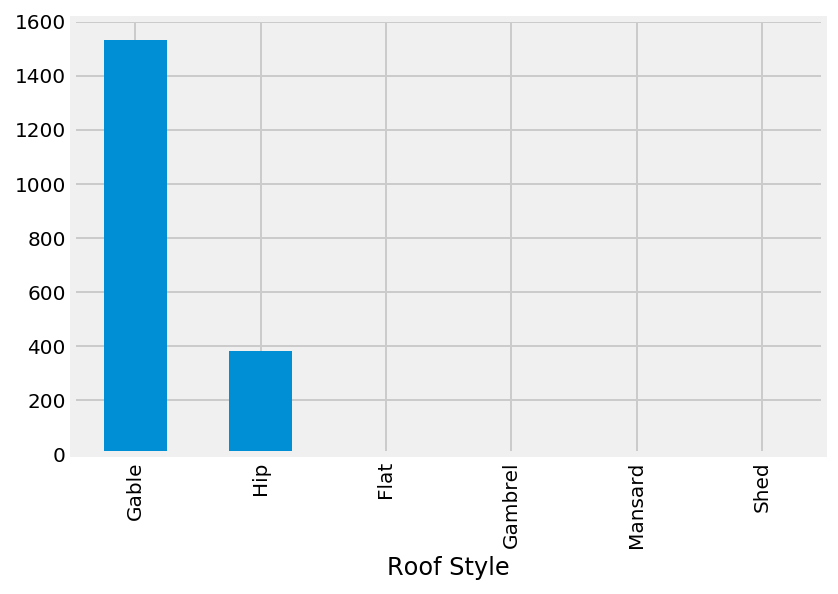

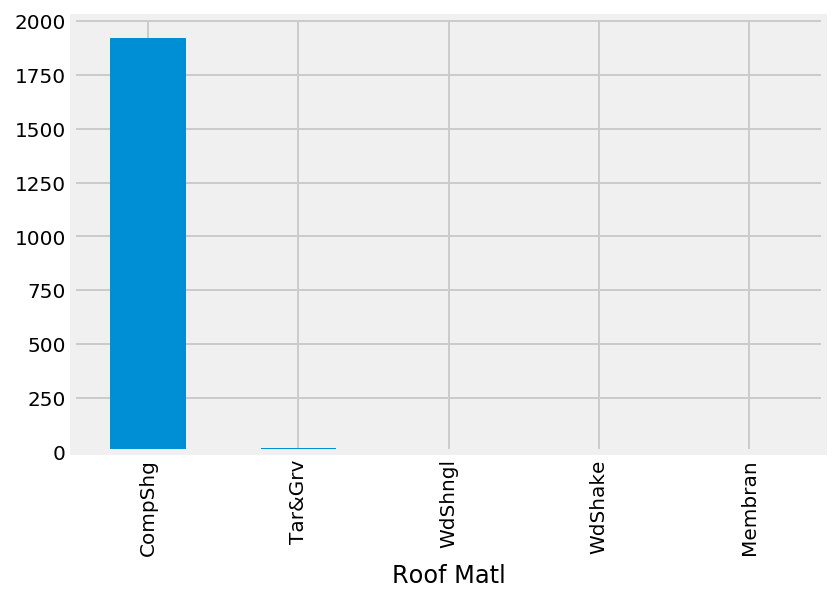

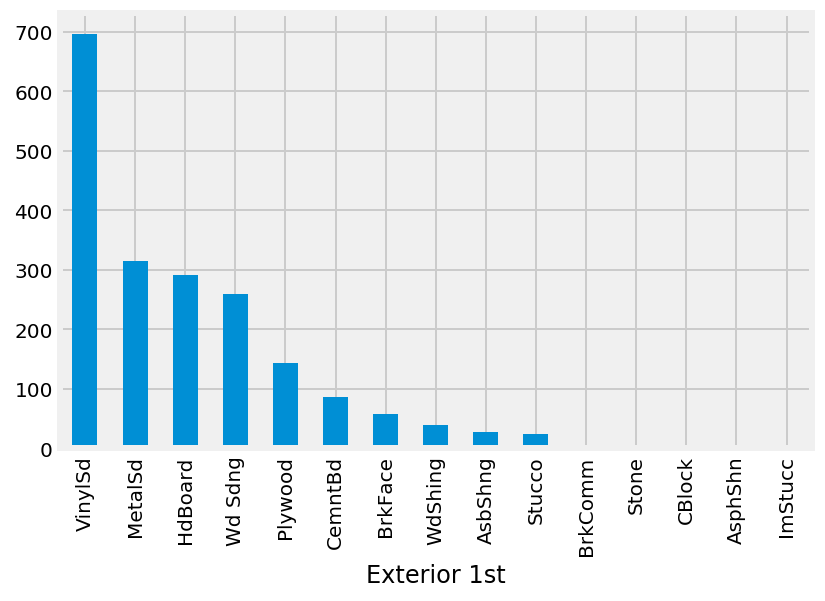

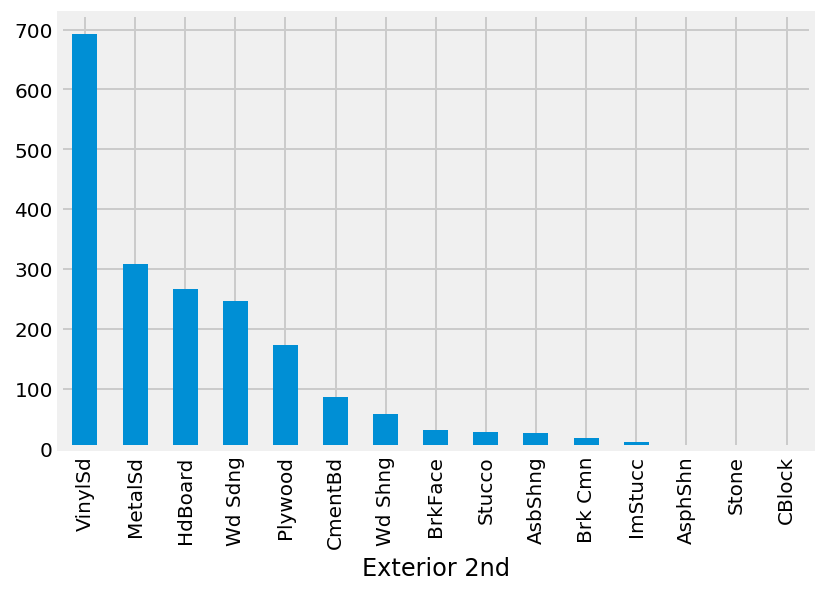

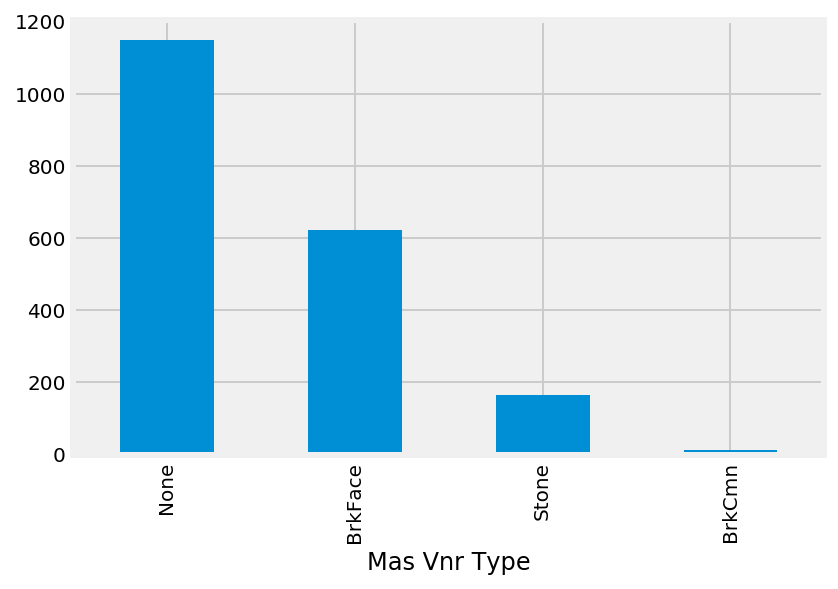

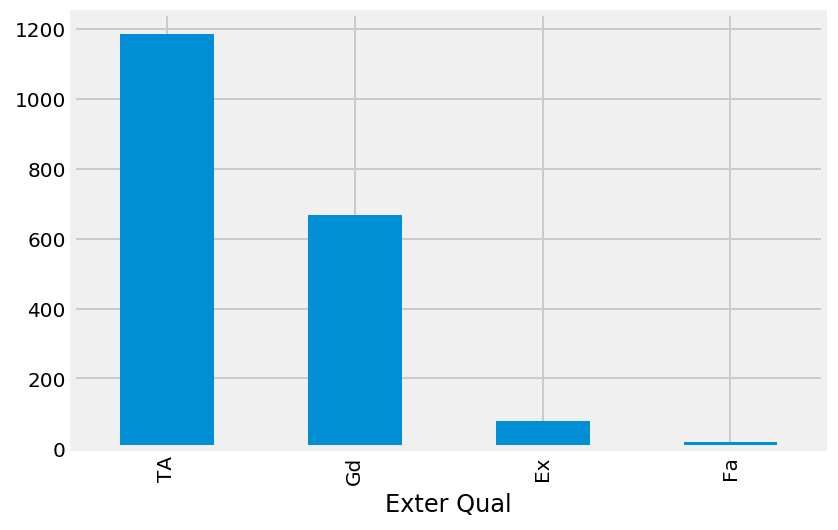

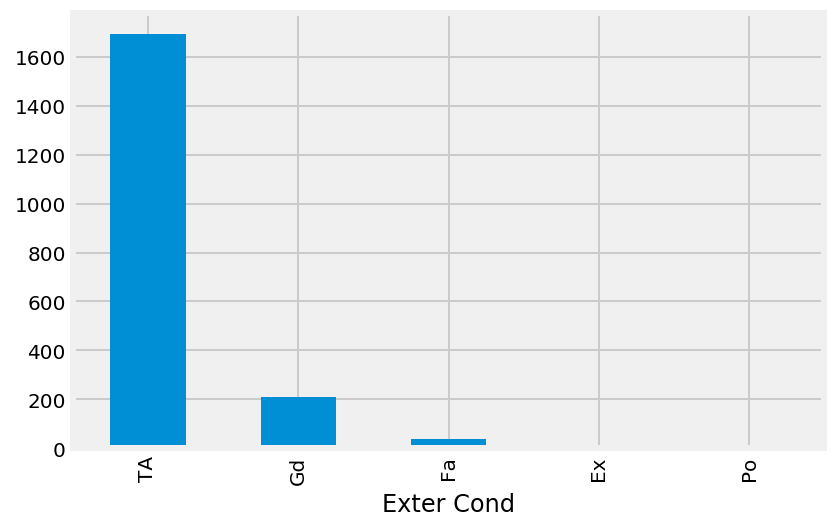

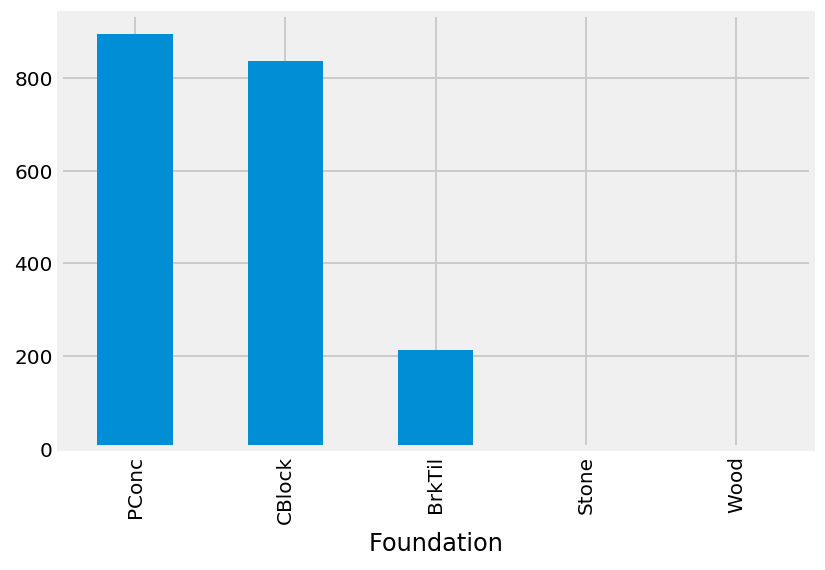

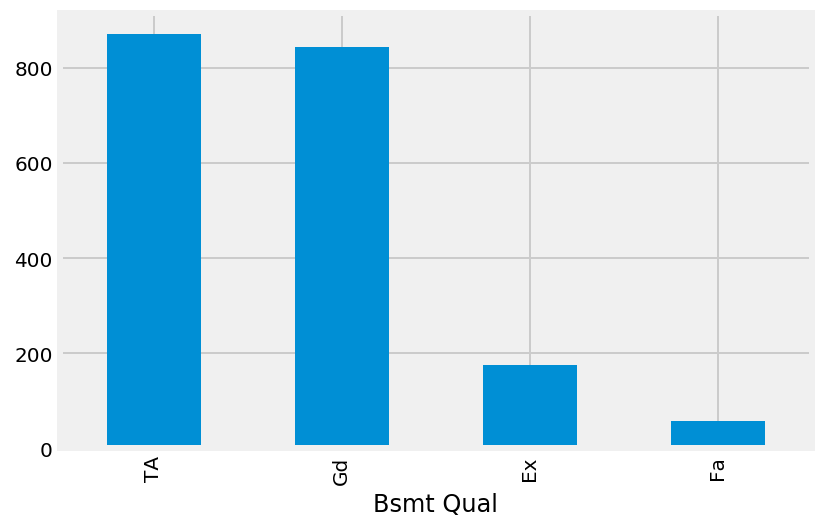

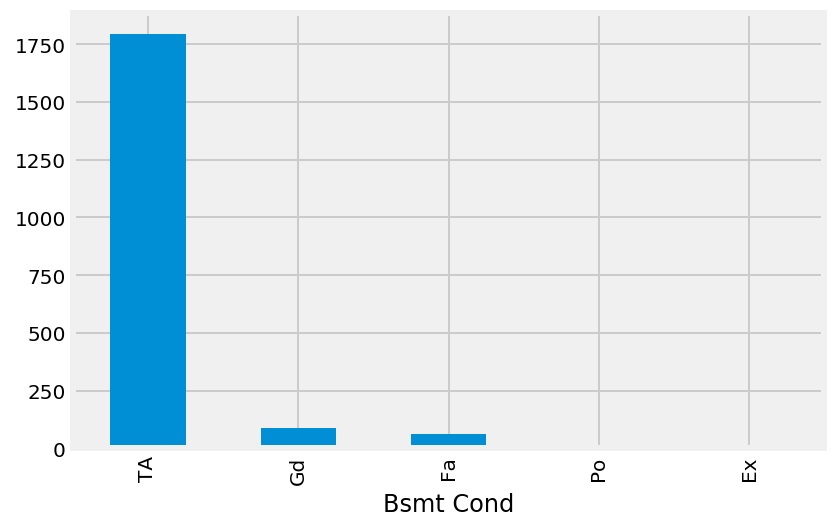

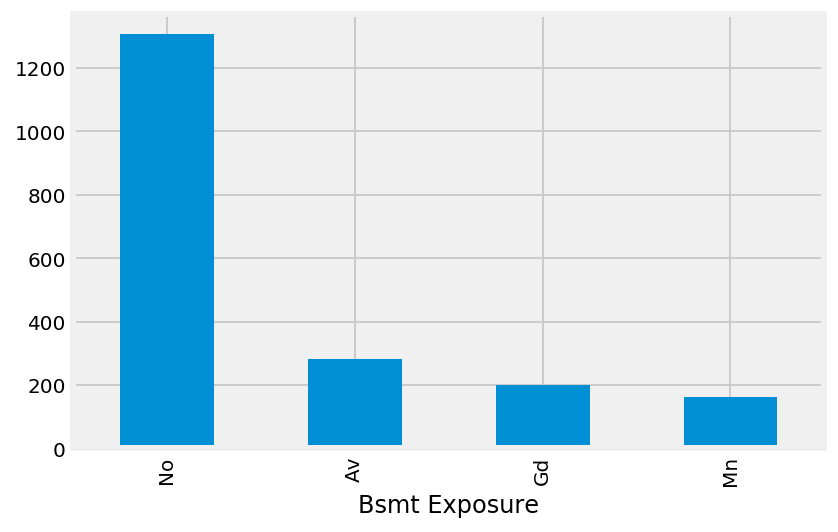

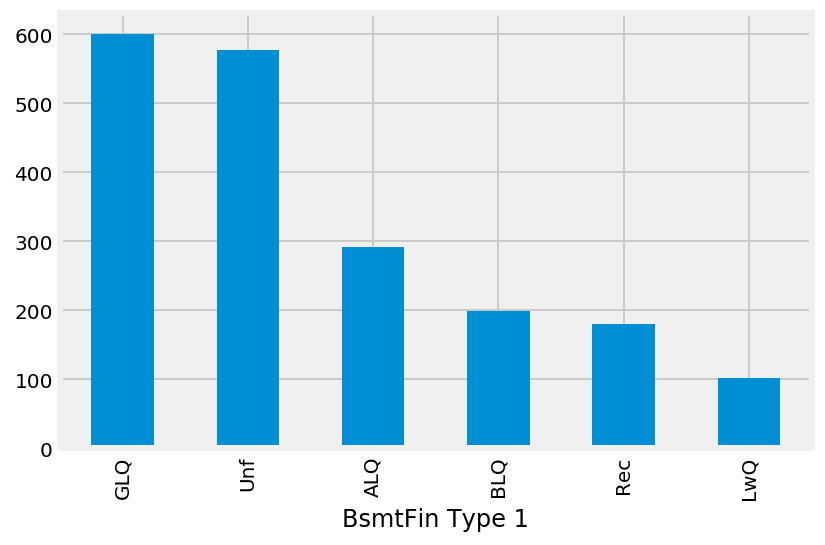

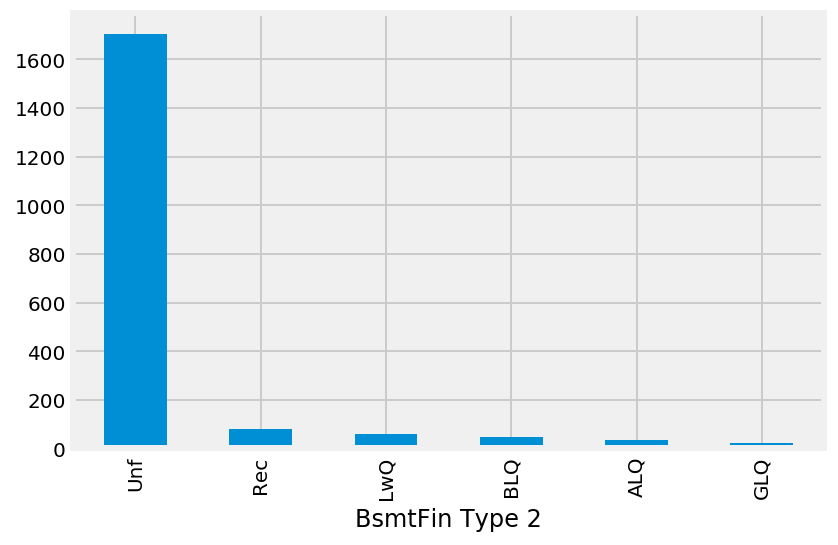

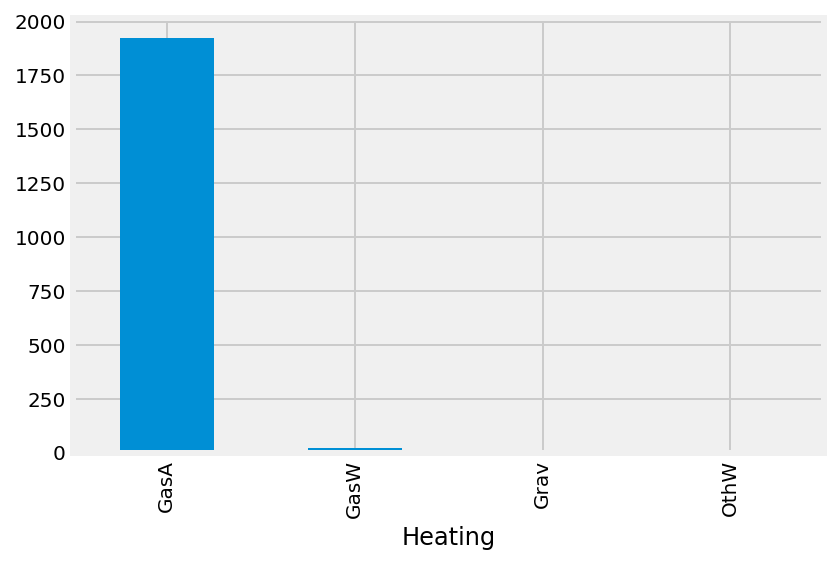

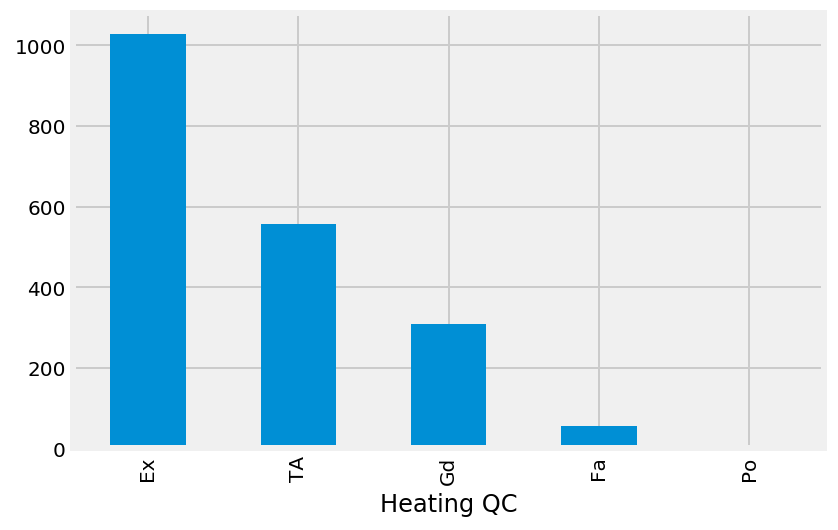

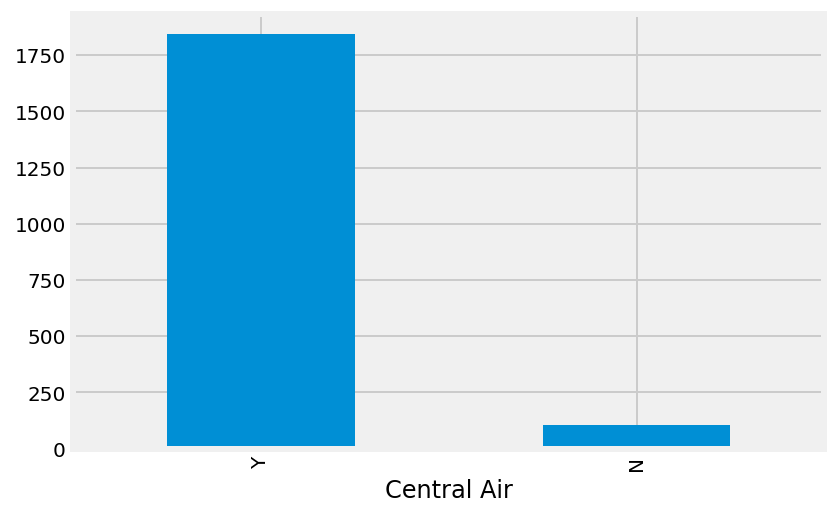

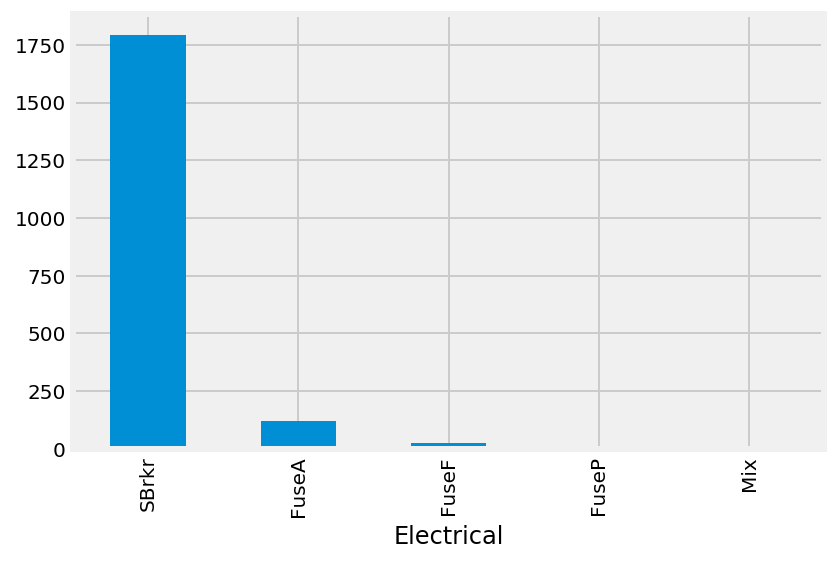

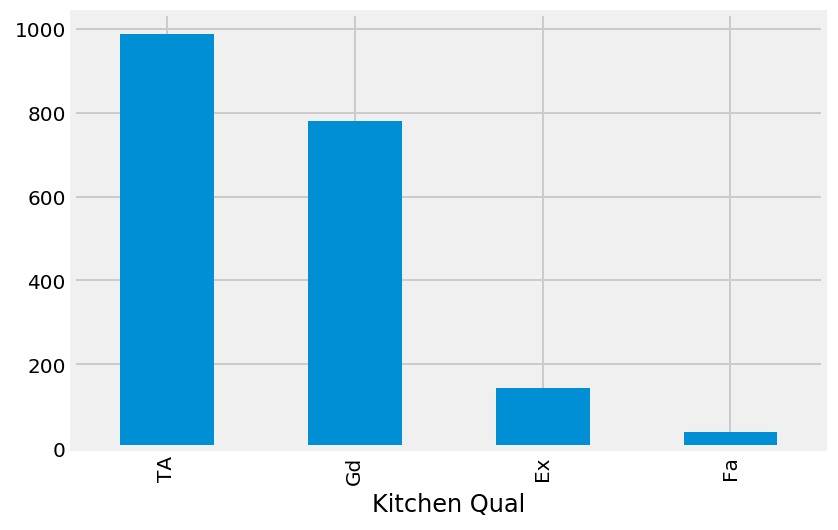

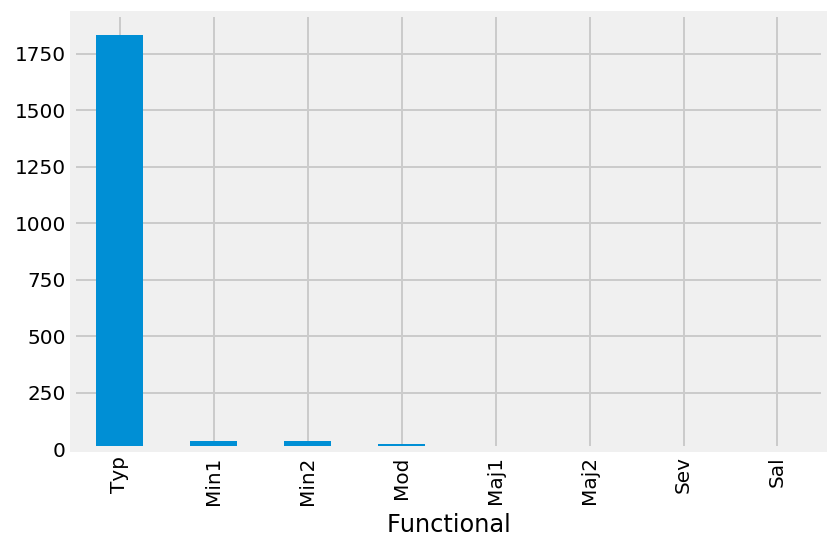

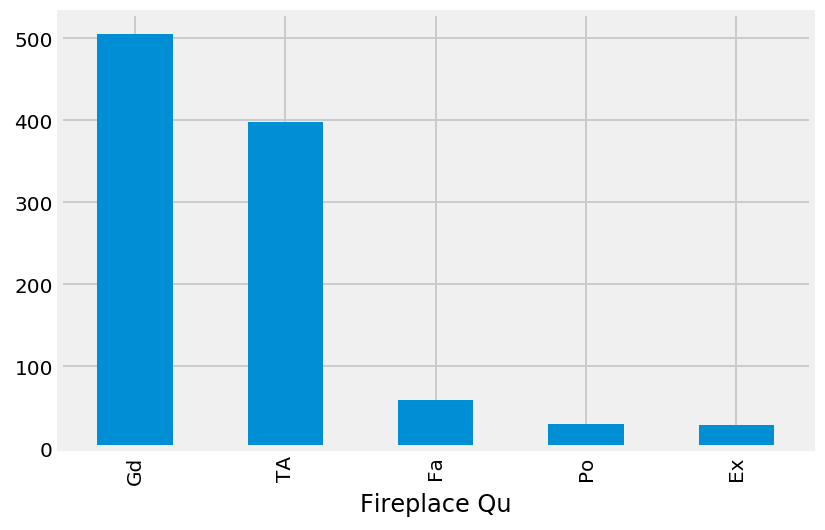

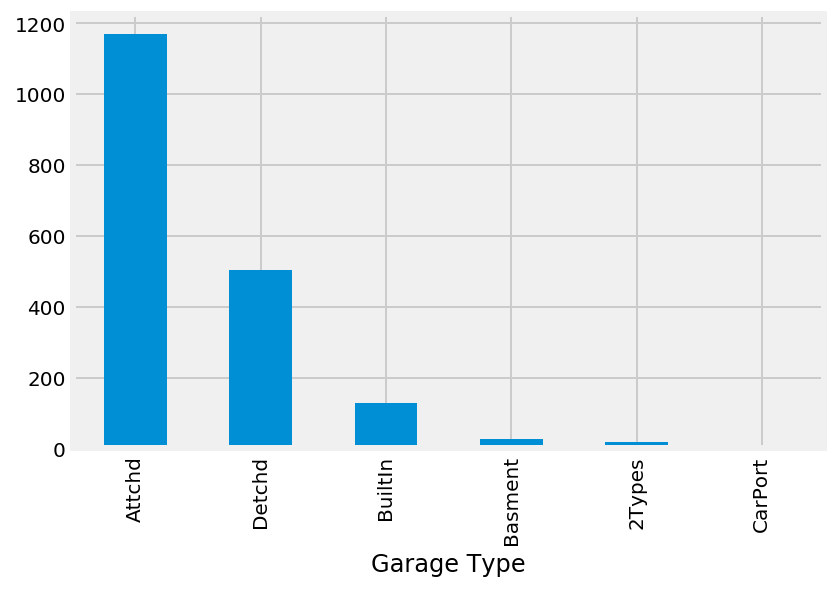

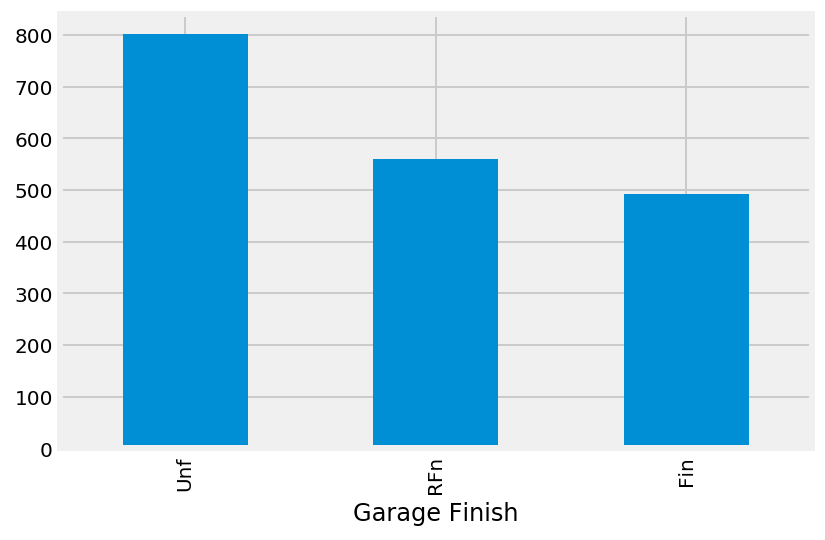

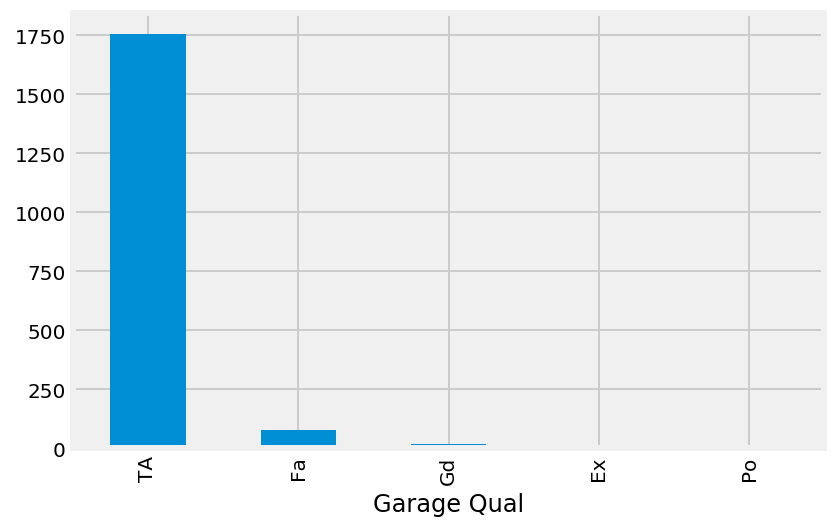

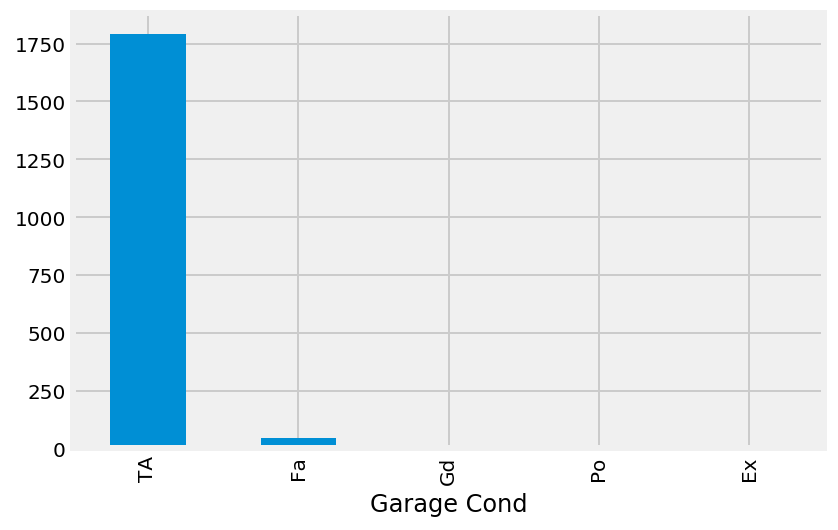

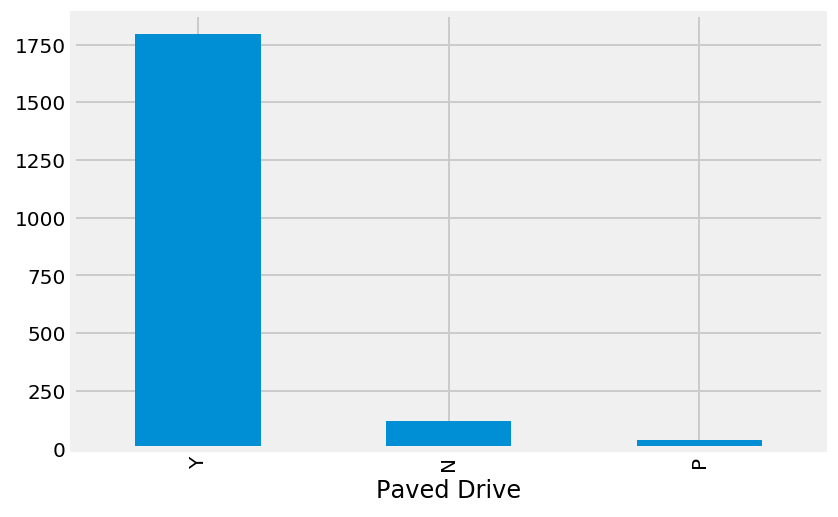

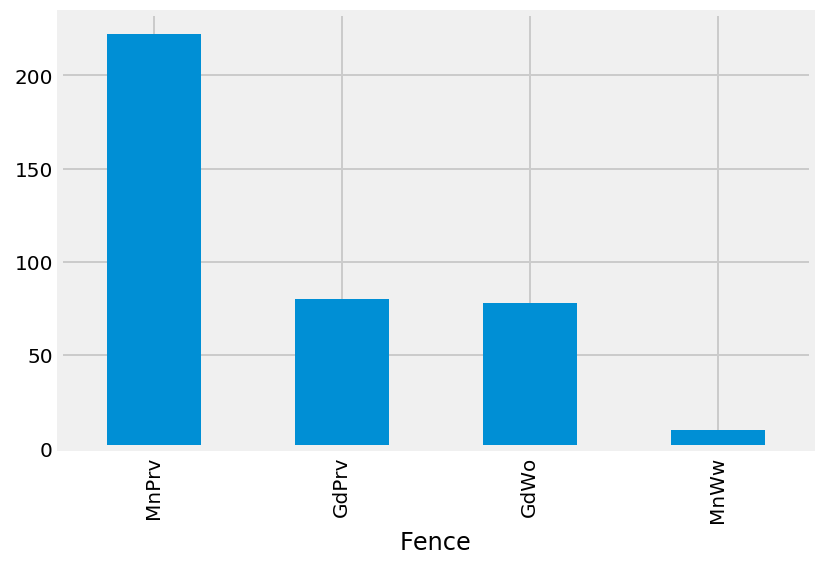

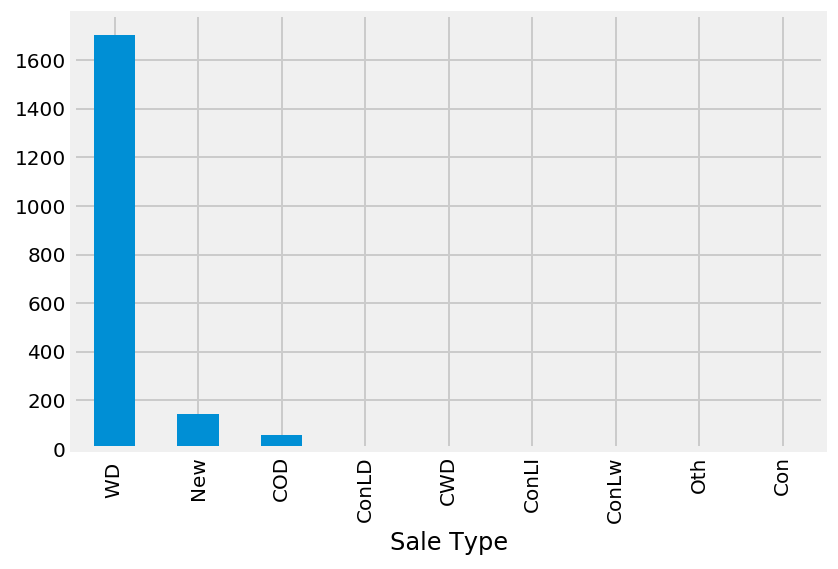

In [84]:
# Visually inspect categorical columns and see if the distribution is spread among different groups
from pandas.api.types import is_string_dtype, is_numeric_dtype

for i in train_df.columns[2:82]:
    if is_string_dtype(train_df[i]):
        train_df[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        plt.show()

The following col seems to have reasonable distribution among different groups for boxplots

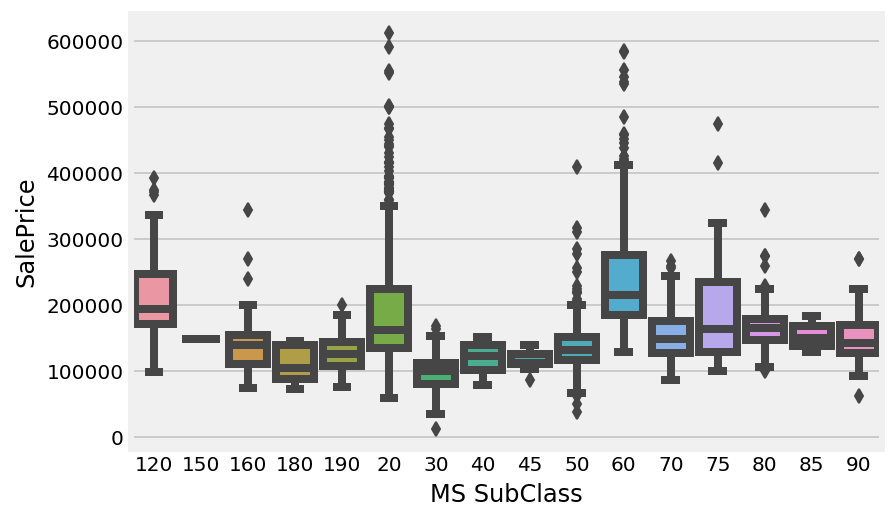

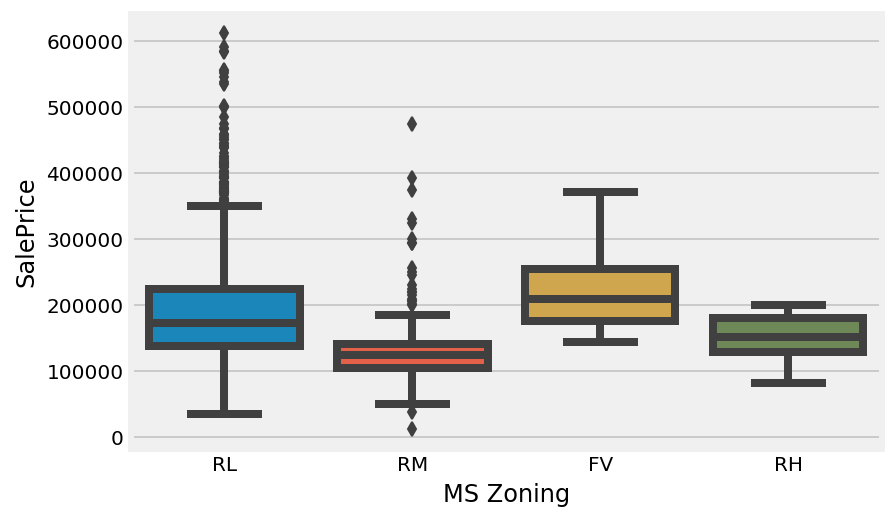

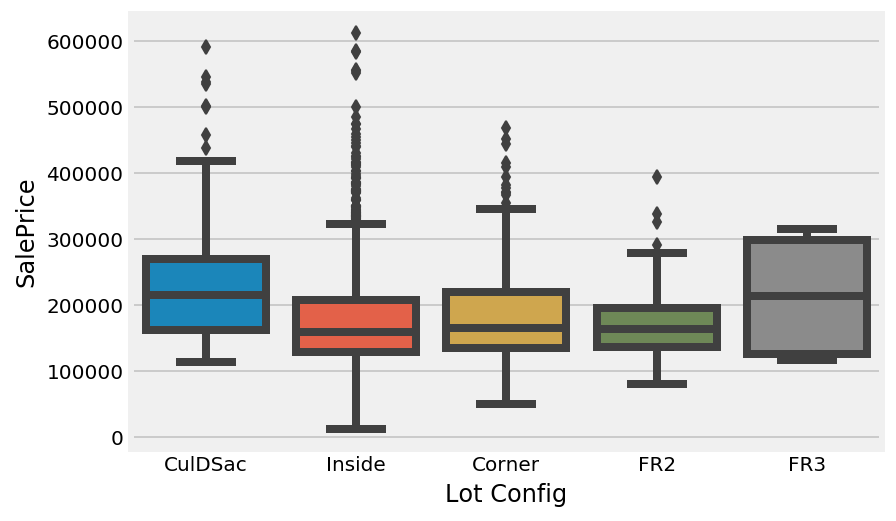

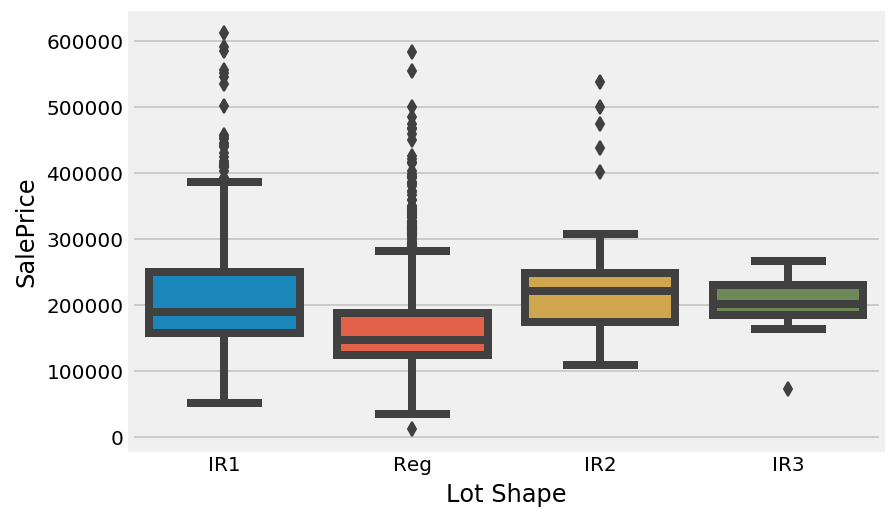

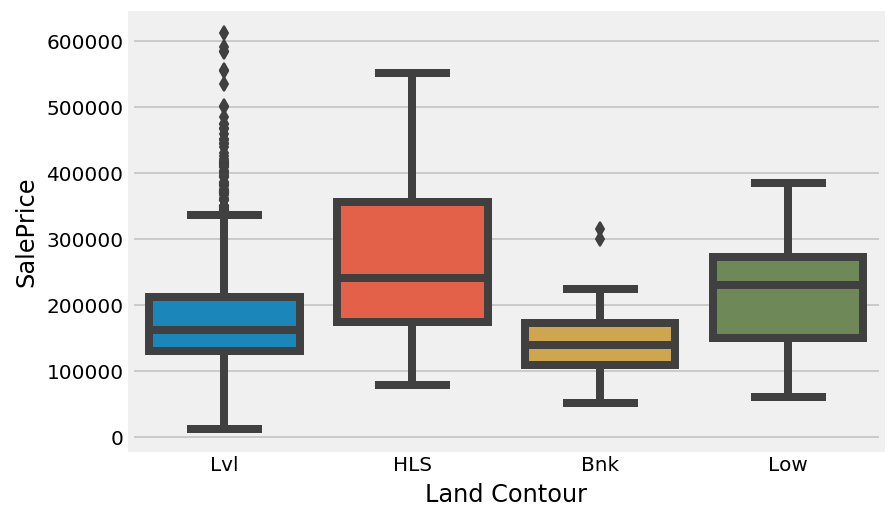

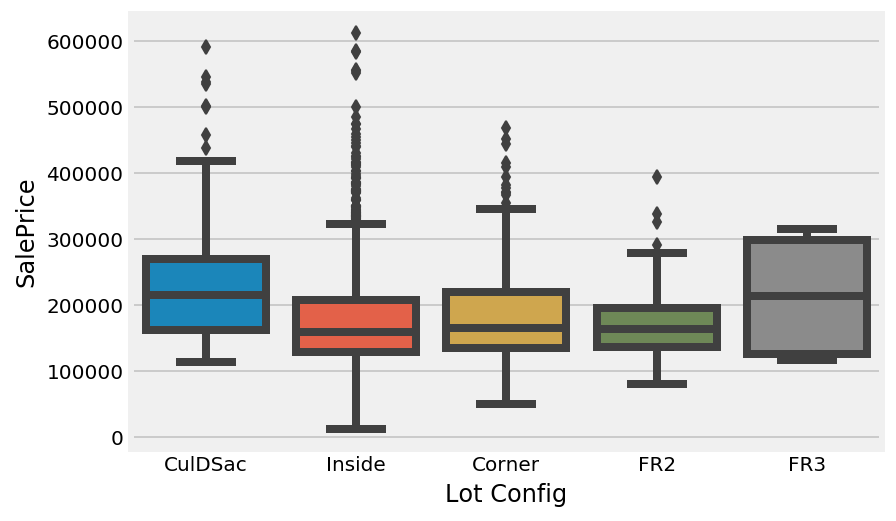

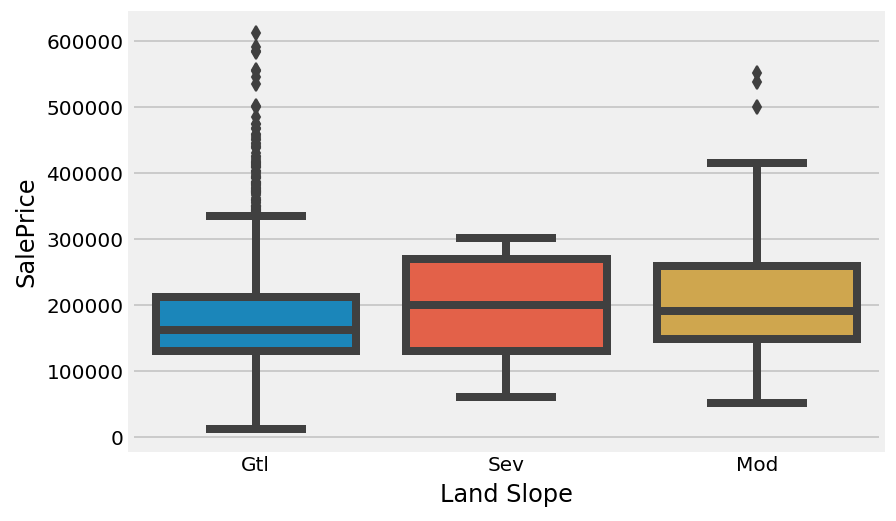

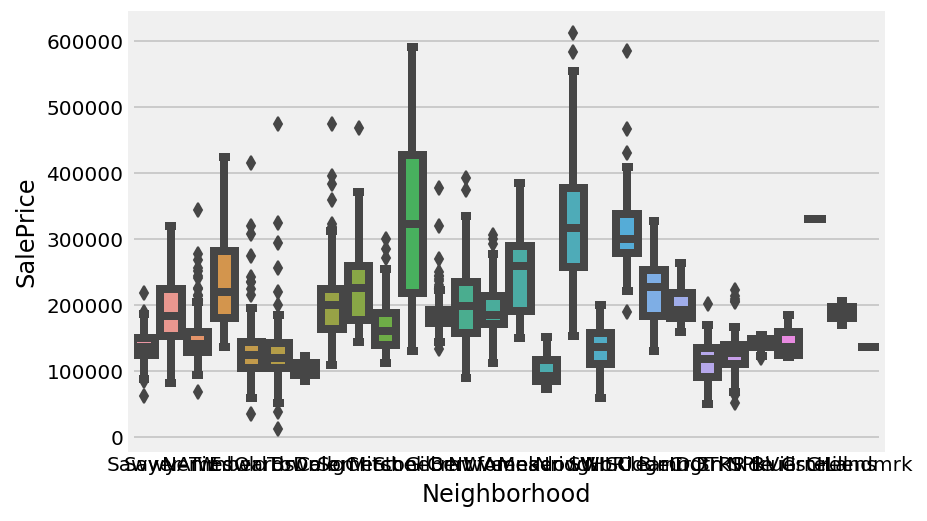

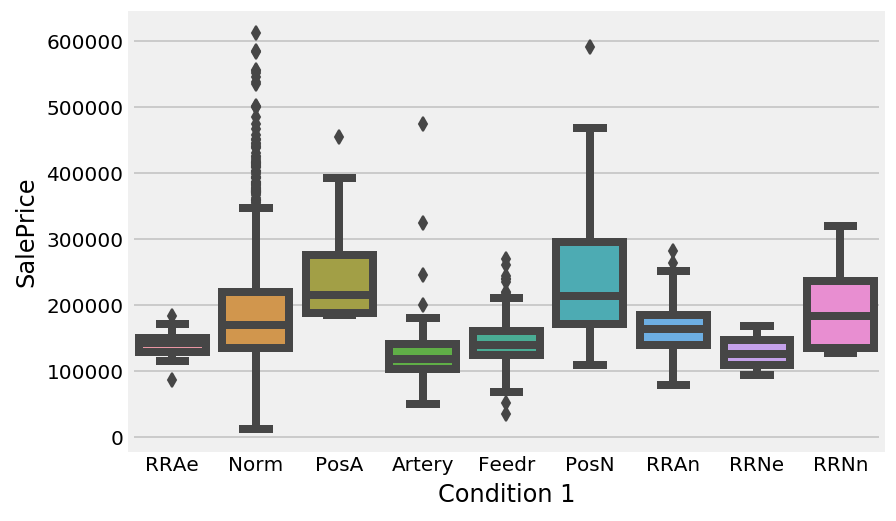

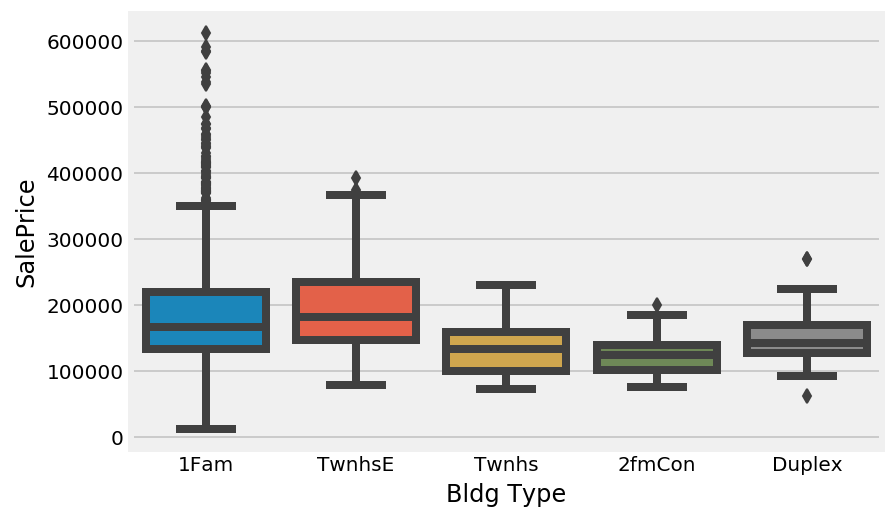

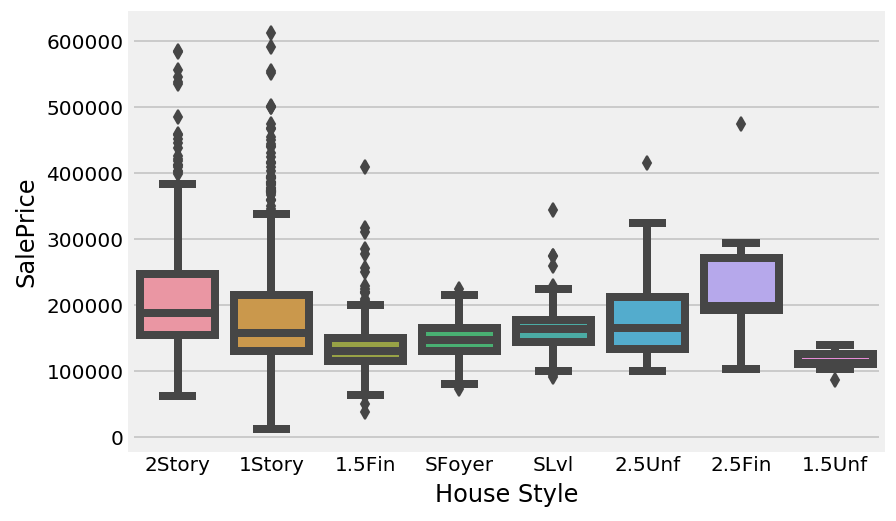

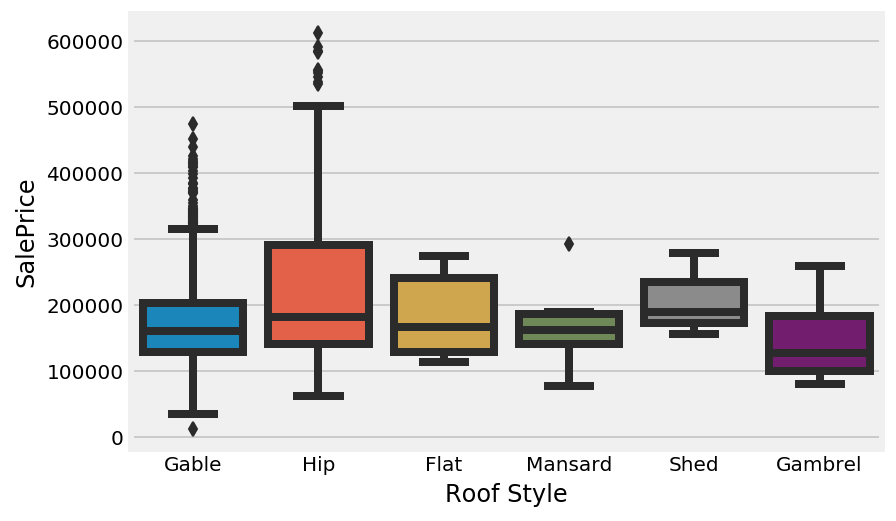

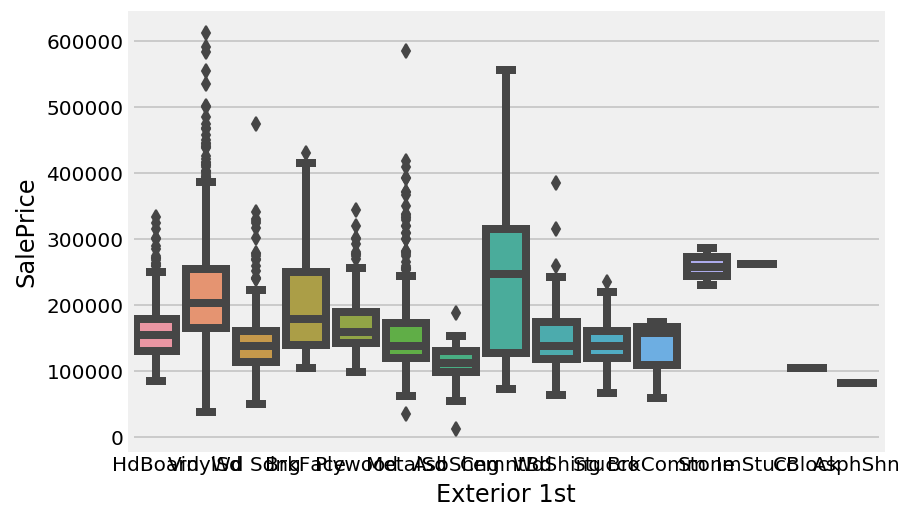

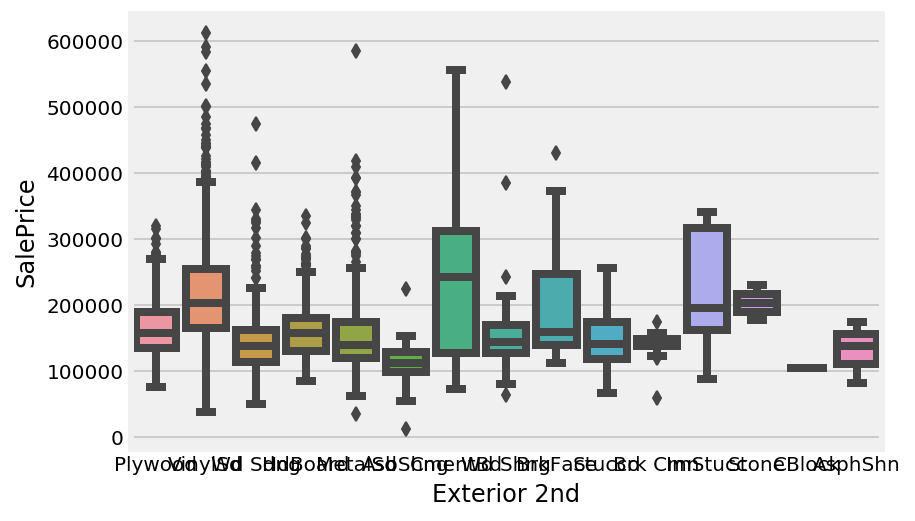

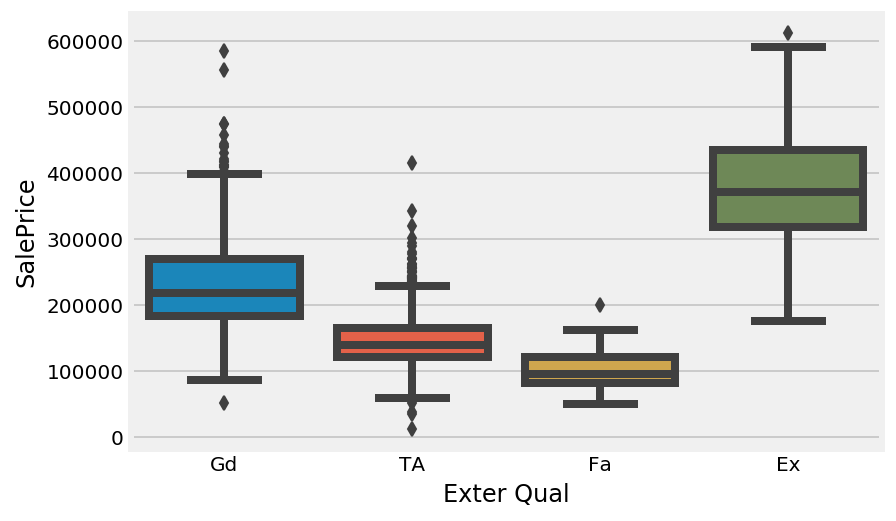

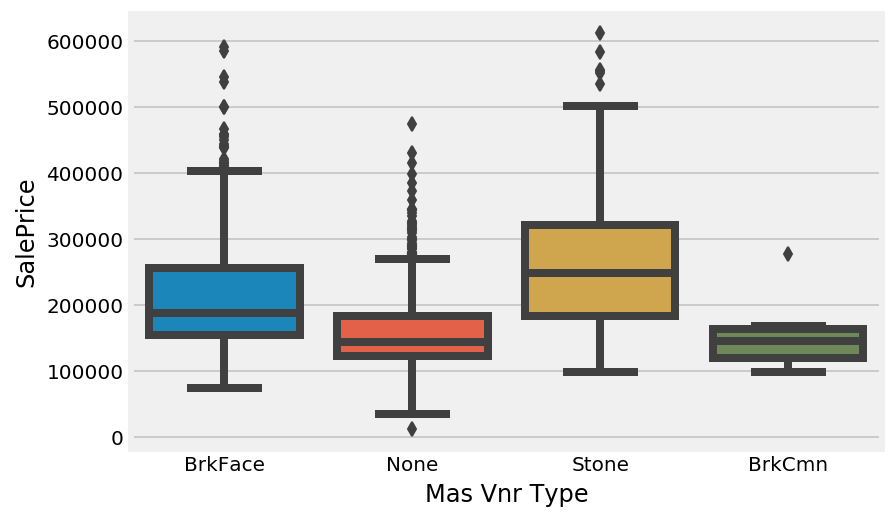

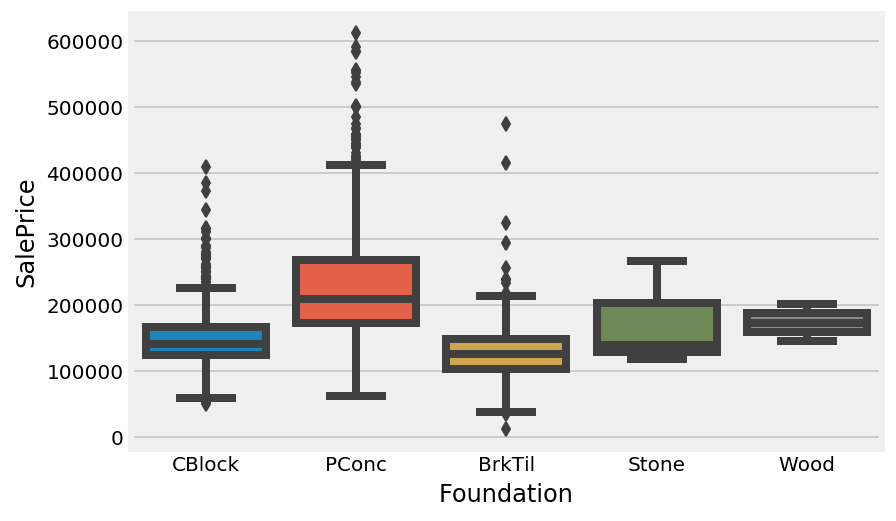

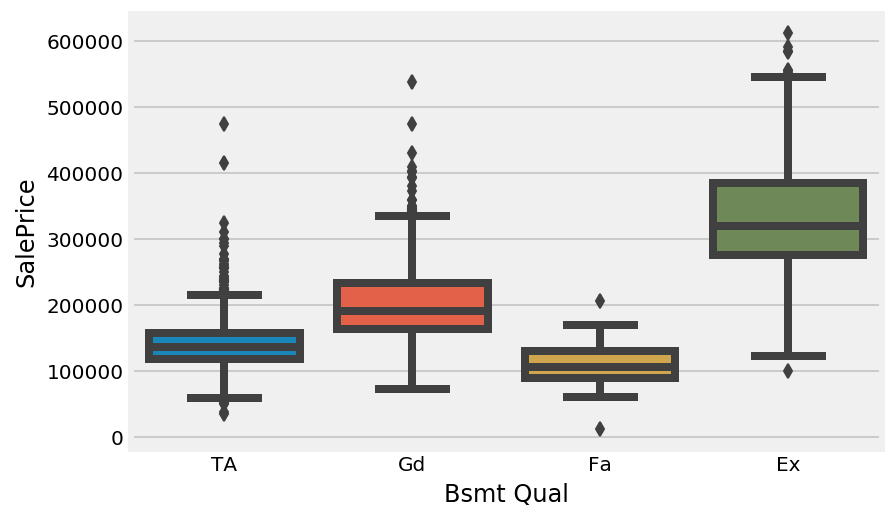

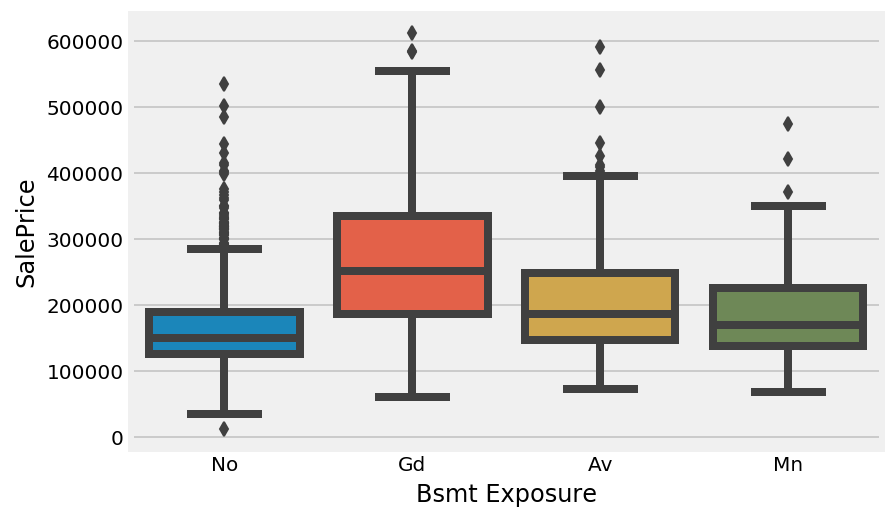

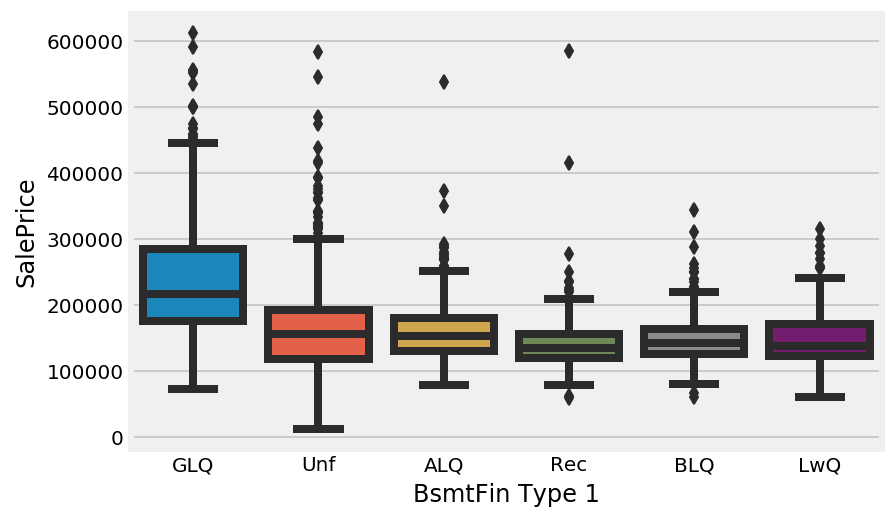

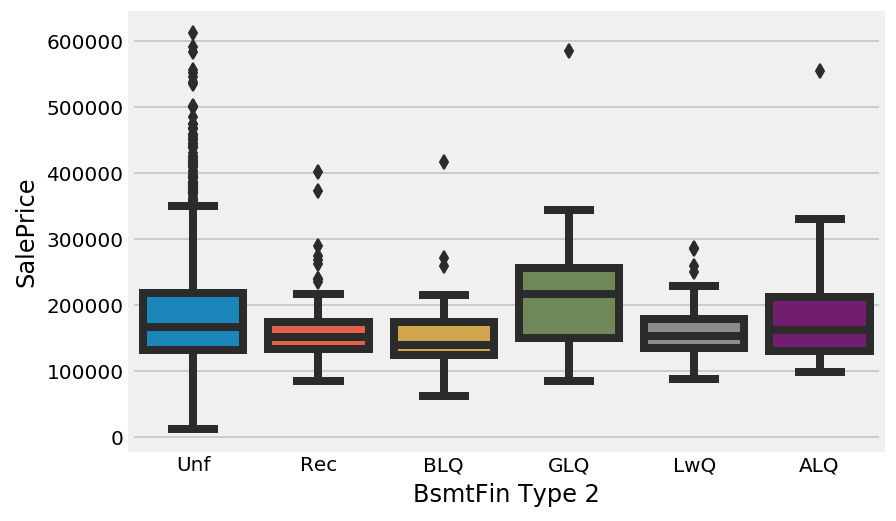

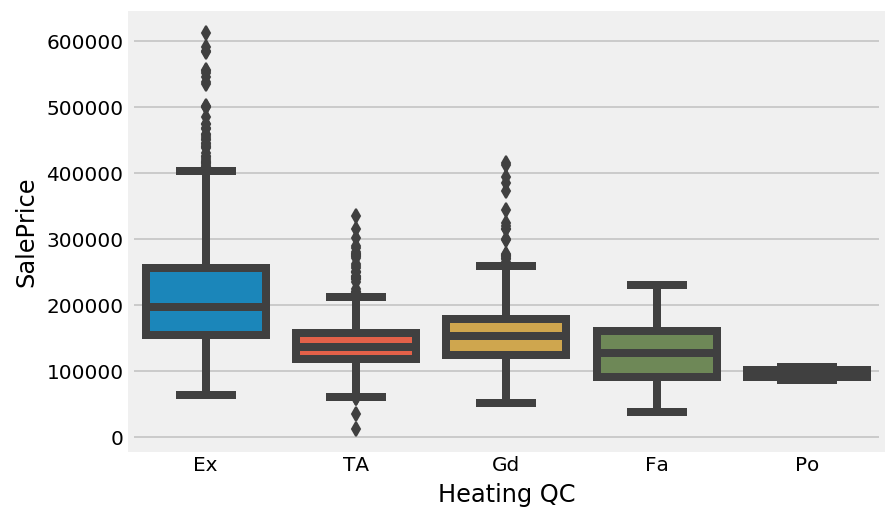

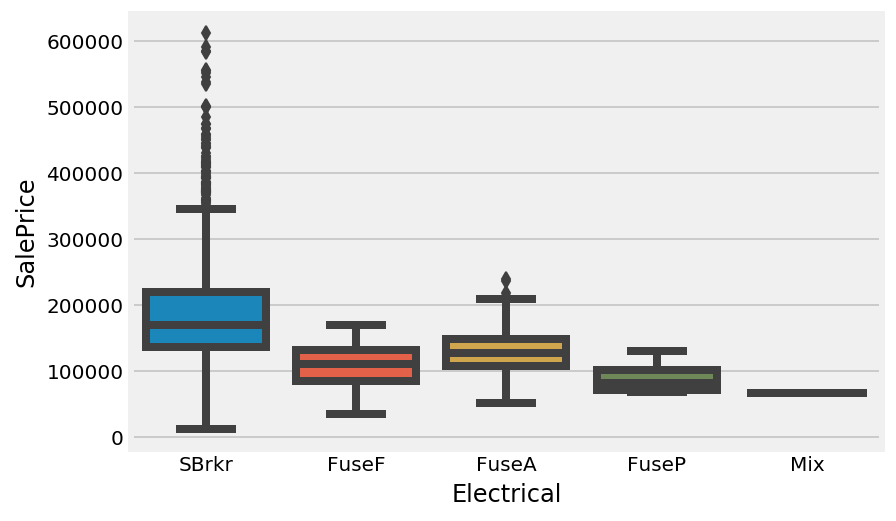

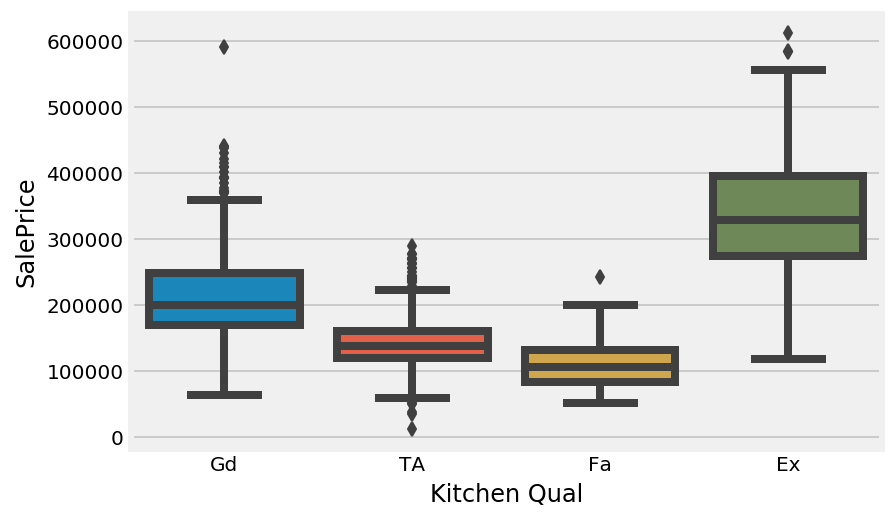

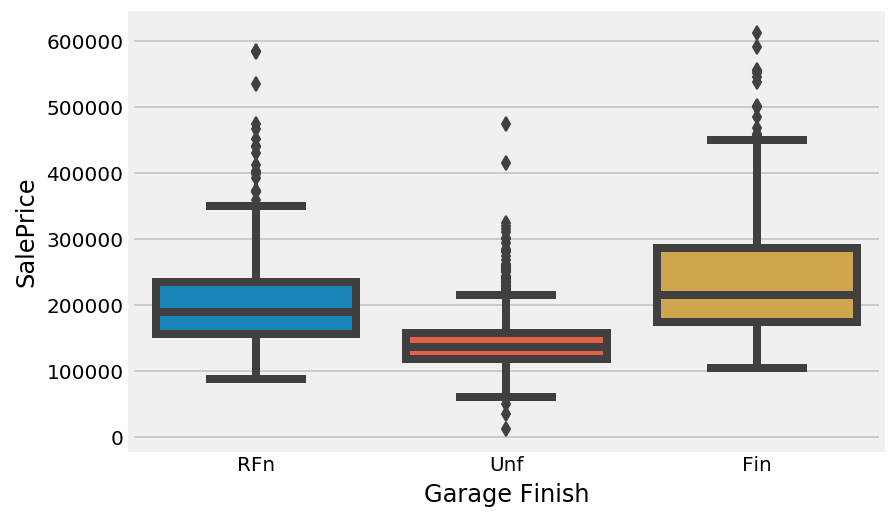

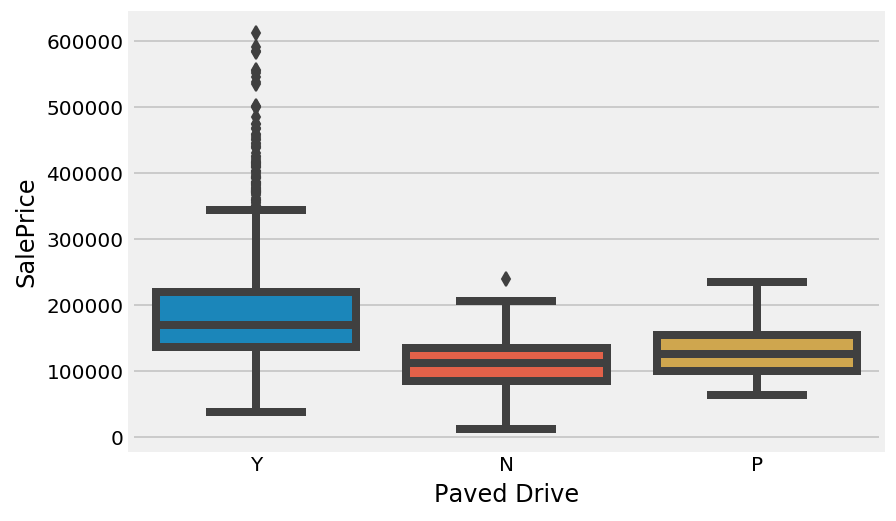

In [85]:
col_to_boxplot = ['MS SubClass','MS Zoning','Lot Config', 'Lot Shape','Land Contour','Lot Config','Land Slope','Neighborhood',\
           'Condition 1','Bldg Type', 'House Style','Roof Style', 'Exterior 1st', 'Exterior 2nd','Exter Qual',\
           'Mas Vnr Type', 'Foundation','Bsmt Qual', 'Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2', 'Heating QC',\
           'Electrical','Kitchen Qual','Garage Finish','Paved Drive']

for i in col_to_boxplot:
    if is_string_dtype(train_df[i]):
        sns.boxplot(x=i,y='SalePrice',data=train_df)
        plt.show()

In [86]:
# The following cols shows certain toggles, they will be considered for feature engineering:

In [87]:
ordinal_col=['Lot Shape','Exter Qual','Bsmt Qual', 'Fireplace Qu','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2', 'Heating QC','Electrical','Kitchen Qual','Garage Finish','Paved Drive']
len(ordinal_col)

12

In [88]:
nominal_col = ['MS Zoning','Land Contour','Neighborhood','Condition 1','Bldg Type', 'House Style','Roof Style', 'Exterior 1st', 'Exterior 2nd','Mas Vnr Type', 'Foundation','Garage Type']
len(nominal_col)

12

In [89]:
# Create numeric col for 'Heating QC'
ordinal_to_num_col('Heating QC',map_qu_nan)

heating_qc_num created


In [90]:
check_col_grps(['Heating QC','heating_qc_num'])

Ex    1028
TA     556
Gd     308
Fa      55
Po       2
Name: Heating QC, dtype: int64
6    1028
4     556
5     308
3      55
2       2
Name: heating_qc_num, dtype: int64


In [91]:
check_col_grps(['Paved Drive'])

Y    1794
N     118
P      37
Name: Paved Drive, dtype: int64


In [92]:
# Create numeric col for 
map_driveway = {'Y':3,'P':2,'N':1}
ordinal_to_num_col('Paved Drive',map_driveway)

paved_drive_num created


In [93]:
check_col_grps(['paved_drive_num'])

3    1794
1     118
2      37
Name: paved_drive_num, dtype: int64


In [94]:
train_df.shape

(1949, 104)

##### Engineering dummy col for norminal cols: ['Garage Type','MS Zoning']

In [95]:
garage_dummy = pd.get_dummies(train_df['Garage Type'],prefix='garage_type').drop(columns='garage_type_CarPort')

# garage_type_CarPort has the least obs (7), drop this col

In [96]:
zoning_dummy = pd.get_dummies(train_df['MS Zoning'], prefix='zoning').drop(columns='zoning_RH')

# zoning_RH has the least obs (14), drop this col (see plot/table below)

In [97]:
train_df['MS Zoning'].value_counts()

RL    1535
RM     307
FV      93
RH      14
Name: MS Zoning, dtype: int64

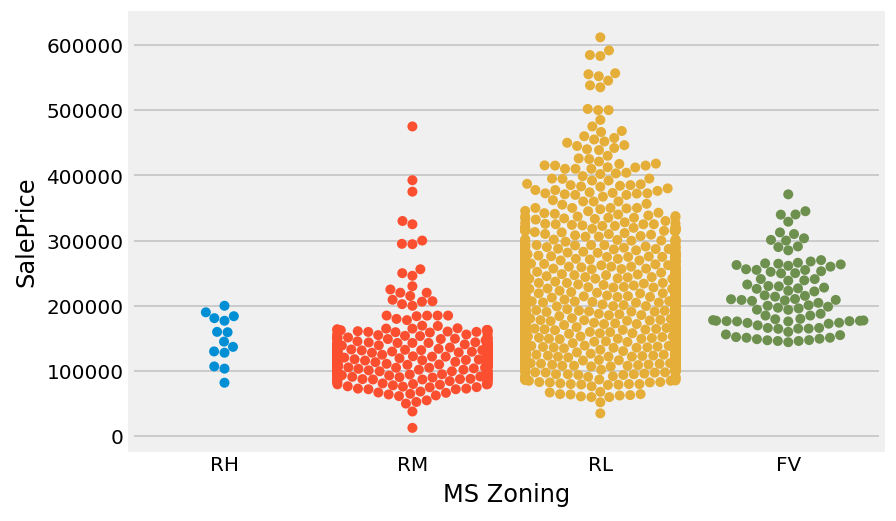

In [98]:
sns.swarmplot(x='MS Zoning', y='SalePrice', data=train_df, order=['RH','RM','RL','FV'])

In [99]:
# For 'Bldg Type', 'House Style','Mas Vnr Type','Foundation','Land Contour'

In [100]:
cols_dummy = pd.get_dummies(train_df[['Bldg Type','House Style','Mas Vnr Type','Foundation','Land Contour']],drop_first=True)

In [101]:
list(cols_dummy.columns)

['Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'House Style_1.5Unf',
 'House Style_1Story',
 'House Style_2.5Fin',
 'House Style_2.5Unf',
 'House Style_2Story',
 'House Style_SFoyer',
 'House Style_SLvl',
 'Mas Vnr Type_BrkFace',
 'Mas Vnr Type_None',
 'Mas Vnr Type_Stone',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Stone',
 'Foundation_Wood',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl']

In [102]:
train_final = pd.concat([train_df,garage_dummy,zoning_dummy,cols_dummy],axis=1)

In [103]:
train_final.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       ...
       'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Stone',
       'Foundation_Wood', 'Land Contour_HLS', 'Land Contour_Low',
       'Land Contour_Lvl'],
      dtype='object', length=133)

In [104]:
train_final.shape

(1949, 133)

In [105]:
filename = '../datasets/pickled_train.csv'
pickle.dump(train_final, open(filename, 'wb'))


#loaded_file = pickle.load(open(filename, 'rb'))